In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import operator
import math
import warnings
import openpyxl
import random
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
import tensorflow as tf
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import pandas as pd

In [3]:
# 한글 글꼴체 변경
plt.rcParams['font.family'] ='Malgun Gothic'
# df.head() 이런거 했을 때, 컬럼이 생략되지 않고, 모든 컬럼 뜨게
pd.set_option('display.max_columns', None)
# 지수 표기법 대신에 소수점으로 표시하는코드
pd.options.display.float_format = '{:.2f}'.format
# 값 길이 제한 X
pd.set_option('display.max_colwidth', None) # 값 길이 제한 없음

## 4월, 5월을 기반으로 데이터 불균형 처리 진행
## 5월 val, 11월을 test로 진행

In [4]:
df = pd.read_csv("data/full_data/TPS_cancel_data_preprocessing_end.csv")

In [5]:
df

,sha2_hash,p_mt,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,churn,CH_25_RATIO_1MONTH
0,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,2,12개월~24개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.00,약정만료전 12개월이상,20240325,733,Y,Y,N,3.00,3개월내없음,N,N,60대,수신,수신,0.00,기타,0.00,N,N,N,0.00
1,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,3,24개월~ 36개월미만,HD,이코노미,N,Y,신규,Y,0건,0건,I/B,0.00,약정만료전 9~12개월,20240325,764,Y,Y,N,3.00,일주일내,Y,N,60대,수신,수신,6.72,JTBC,0.00,N,N,N,3.33
2,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,4,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.00,약정만료전 9~12개월,20240325,794,Y,Y,N,3.00,3주일전,N,N,60대,수신,수신,9.86,기타,0.00,N,N,N,3.71
3,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,5,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.00,약정만료전 9~12개월,20240325,825,Y,Y,N,3.00,4주일전,N,N,60대,수신,수신,5.95,기타,0.00,N,N,N,3.57
4,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,6,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,0.00,약정만료전 6~9개월,20240325,855,Y,Y,N,3.00,일주일내,N,N,60대,수신,수신,4.03,기타,0.00,N,N,N,6.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483407,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,8,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.00,약정만료후 12개월이상,20200405,2338,N,N,N,1.00,일주일내,N,N,50대,수신,수신,2.03,KBS1,0.00,N,N,N,0.01
21483408,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,9,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.00,약정만료후 12개월이상,20200405,2368,N,N,N,1.00,일주일내,N,N,50대,수신,수신,2.91,기타,1.00,N,N,N,0.00
21483409,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,10,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.00,약정만료후 12개월이상,20200405,2399,N,N,N,1.00,2주일전,Y,N,50대,수신,수신,1.97,기타,0.00,N,N,N,0.19
21483410,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,11,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,0.00,약정만료후 12개월이상,20200405,2429,N,N,N,1.00,3개월내없음,N,N,50대,수신,수신,0.00,기타,0.00,N,N,N,0.00


In [6]:
# 4,5,6월은 train
# 11월은 test

train = df[df['p_mt'].isin([4,5])]
val = df[df['p_mt'] == 6]
test = df[df['p_mt'] == 11]

In [5]:
val.to_csv("data/train/validation.csv", index=False)
test.to_csv("data/train/test.csv", index=False)

In [7]:
# 비율 확인
train['churn'].value_counts(normalize=True) * 100

churn
N   99.32
Y    0.68
Name: proportion, dtype: float64

In [8]:
train['churn'].value_counts()

churn
N    3888294
Y      26547
Name: count, dtype: int64

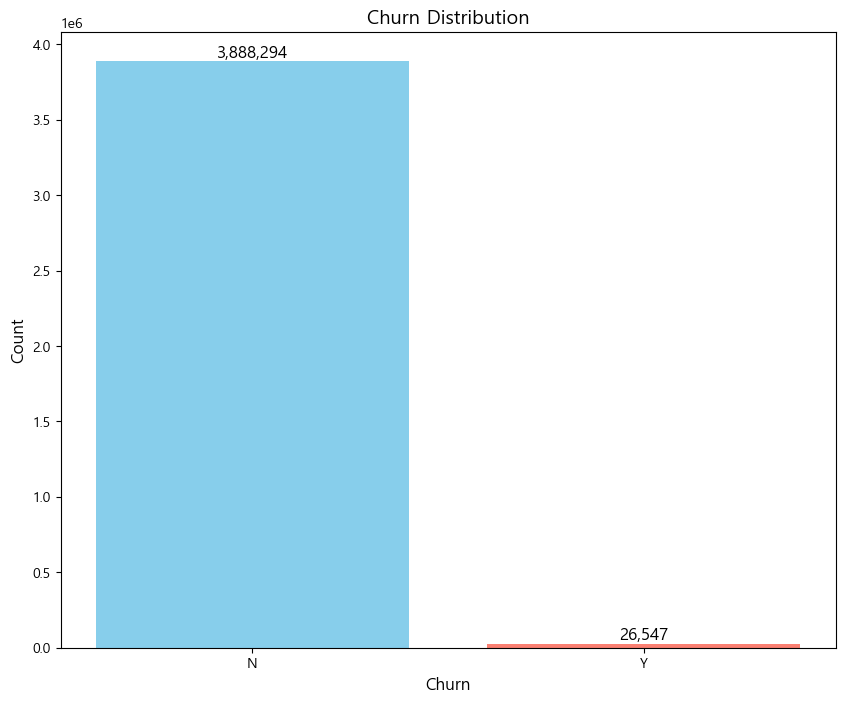

In [7]:
# 클래스별 개수 확인
churn_counts = train['churn'].value_counts()

# 그래프 그리기
plt.figure(figsize=(10, 8))
bars = plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'salmon'])

# 막대 위에 숫자 표시
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():,}', ha='center', va='bottom', fontsize=12)

# 제목 및 라벨 추가
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Churn Distribution', fontsize=14)
plt.xticks(churn_counts.index, labels=[str(i) for i in churn_counts.index])

# 그래프 표시
plt.show()


---

### 1. 랜덤 언더 샘플링 (5:5)

In [8]:
train = train.drop(columns = ['sha2_hash','AGMT_END_YMD','p_mt'])

In [9]:
from imblearn.under_sampling import RandomUnderSampler

X = train.drop(columns = ['churn'])
y = train['churn']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [10]:
print("Before RU:")
print(y.value_counts())  # 원본 데이터 클래스 분포

print("\nAfter RU:")
print(pd.Series(y_resampled).value_counts())  # 증강 후 클래스 분포

Before RU:
churn
N    3888294
Y      26547
Name: count, dtype: int64

After RU:
churn
N    26547
Y    26547
Name: count, dtype: int64


In [11]:
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled, name='churn')

resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

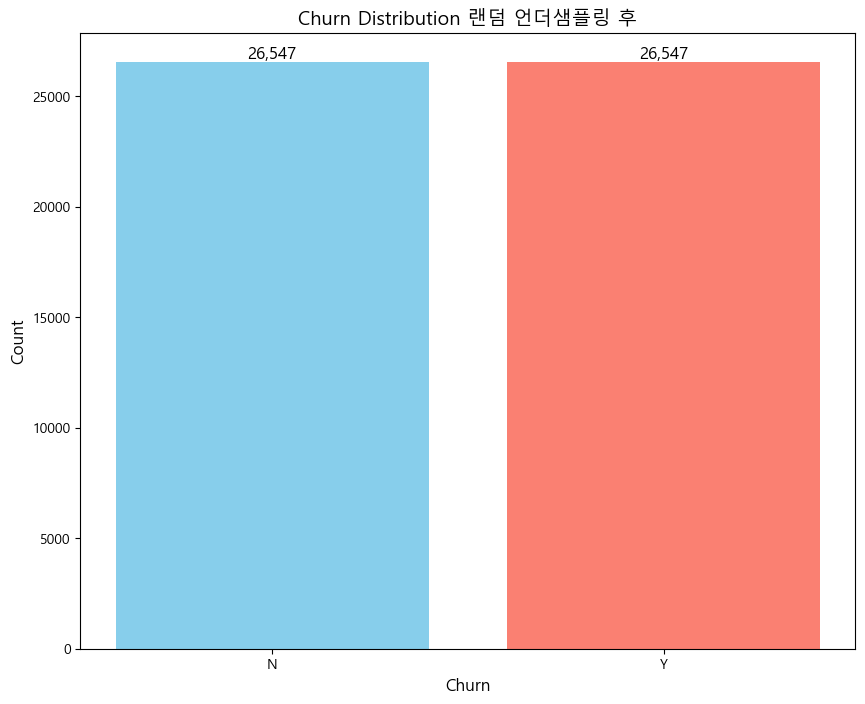

In [12]:
import matplotlib.pyplot as plt

# 클래스별 개수 확인
churn_counts = resampled_data['churn'].value_counts()

# 그래프 그리기
plt.figure(figsize=(10, 8))
bars = plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'salmon'])

# 막대 위에 숫자 표시
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():,}', ha='center', va='bottom', fontsize=12)

# 제목 및 라벨 추가
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Churn Distribution 랜덤 언더샘플링 후', fontsize=14)
plt.xticks(churn_counts.index, labels=[str(i) for i in churn_counts.index])

# 그래프 표시
plt.show()


In [13]:
# CSV 파일로 저장
resampled_data.to_csv('data/train/train_undersample_4_5.csv', index=False)

---

### 2. SMOTE-NC 샘플링 진행

train -> 4,5월 데이터를 smote_nc 진행 <br>
val -> 6월 데이터를 val 진행 <br>
test -> 11월 데이터를 test 진행

SMOTE_NC는 연속형과 범주형 변수가 섞여있는 데이터에 사용되는 <B>오버샘플링</B> 기법임. <BR>
SMOTE_NC는 범주형 변수는 가장 가까운 샘플에서 다수결 방식으로 선택하고, 연속형 변수만 기존 방식처럼 보간하여 생성하기 때문에, 데이터 왜곡을 최소화할 수 있음.

#### 주피터에서는 불가능 -> 코랩 pro에서 진행함.

코랩코드

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import operator
import math
import warnings
import openpyxl
import random
warnings.filterwarnings("ignore")
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
import tensorflow as tf
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

In [ ]:
plt.rc('font', family='NanumBarunGothic', size=11)
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인
# df.head() 이런거 했을 때, 컬럼이 생략되지 않고, 모든 컬럼 뜨게
pd.set_option('display.max_columns', None)
# 지수 표기법 대신에 소수점으로 표시하는코드
pd.options.display.float_format = '{:.2f}'.format
# 값 길이 제한 X
pd.set_option('display.max_colwidth', None) # 값 길이 제한 없음

In [ ]:
# 코랩 내에서 데이터 불러오기
# 4,5월 train
# 6월 val
# 11월 test

datapath_train = '/content/drive/MyDrive/Colab Notebooks/data/rawData_456/train.csv'
datapath_val = '/content/drive/MyDrive/Colab Notebooks/data/rawData_456/validation.csv'
datapath_test = '/content/drive/MyDrive/Colab Notebooks/data/rawData_456/test.csv'
train = pd.read_csv(datapath_train)
val = pd.read_csv(datapath_val)
test = pd.read_csv(datapath_test)

In [ ]:
display(train, val, test)

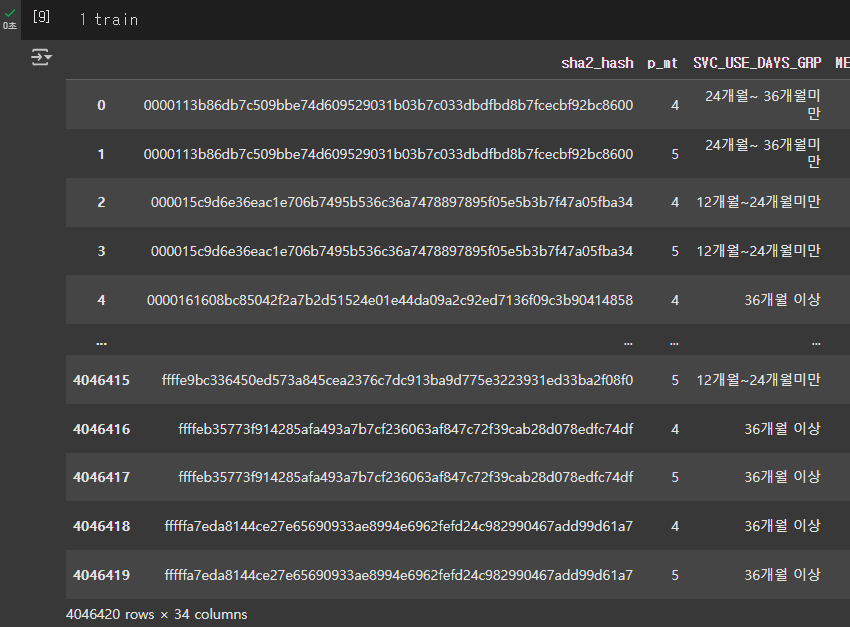

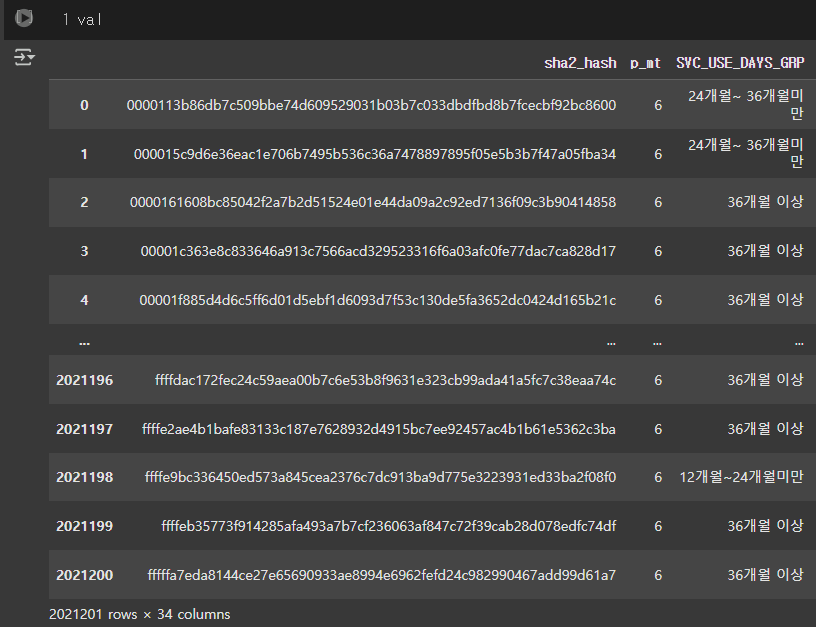

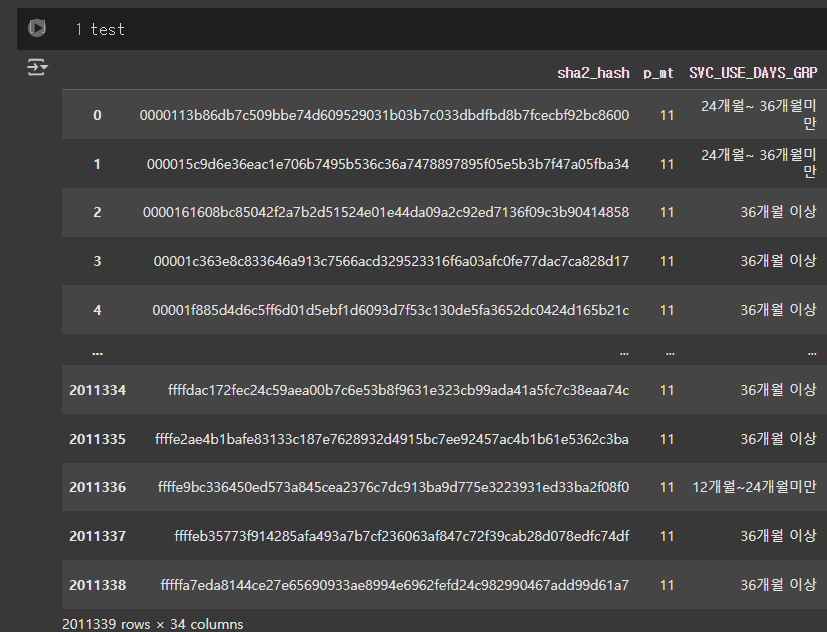

In [ ]:
train = train.drop(columns=['sha2_hash','AGMT_END_YMD','p_mt'])
val = val.drop(columns=['sha2_hash','AGMT_END_YMD','p_mt'])
test = test.drop(columns=['sha2_hash','AGMT_END_YMD','p_mt'])

SMOTE-NC 기법 사용해서 오버샘플링 후, CSV로 저장함.<br><br>
대략 30분동안 진행됨

In [ ]:
# SMOTE-NC로 데이터 불균형 해결

X = train.drop(columns = ['churn'])
y = train['churn']

categorical_cols = X.select_dtypes(include='object').columns
categorical_indices = [X.columns.get_loc(col) for col in categorical_cols]

print("범주형 변수의 컬럼:", categorical_cols.tolist())
print("범주형 변수의 인덱스:", categorical_indices)

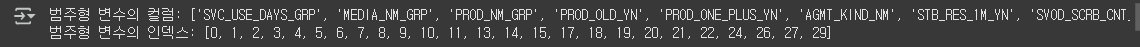

In [ ]:
# SMOTE-NC 객체 생성
smote_nc = SMOTENC(
    categorical_features=categorical_indices,
    random_state=42
)

X_smote, y_smote = smote_nc.fit_resample(X, y)

In [ ]:
print("Before SMOTE-NC:")
print(y.value_counts())  # 원본 데이터 클래스 분포

print("\nAfter SMOTE-NC:")
print(pd.Series(y_smote).value_counts())  # 증강 후 클래스 분포

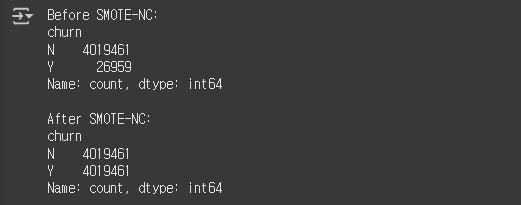

In [ ]:
# 증강된 데이터를 DataFrame으로 변환
X_smote = pd.DataFrame(X_smote, columns=X.columns)  # X 컬럼 이름 복원
y_smote = pd.Series(y_smote, name='churn')          # y를 시리즈로 변환

In [ ]:
# 병합하여 최종 데이터 생성
train_smote_nc = pd.concat([X_smote, y_smote], axis=1)

In [ ]:
# CSV로 저장
# 코랩에서 파일 만든 뒤, 필자의 C드라이브 파일로 옮김.

csv_path = "/content/drive/MyDrive/Colab Notebooks/data/train_smotenc_4_5.csv"  # 코랩 기본 경로에 저장
train_smote_nc.to_csv(csv_path, index=False)

In [ ]:
train_smote_nc[train_smote_nc['churn'] == 'Y']

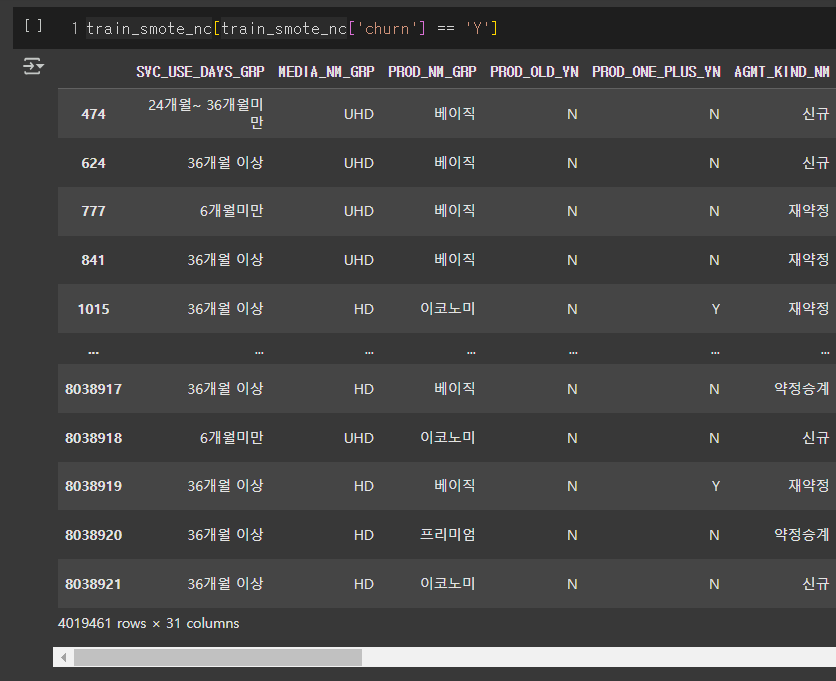

---

### 3. SMOTE-NC + 랜덤 언더 샘플링
6:4 비율로 (실제 상황과 비슷하게)

train -> 4,5월 데이터를 smote_nc 진행 <br>
val -> 6월 데이터를 val 진행 <br>
test -> 11월 데이터를 test 진행

#### 주피터에서 불가능, 코랩 pro에서 진행

In [ ]:
X = train.drop(columns=['churn'])
y = train['churn']

categorical_cols = X.select_dtypes(include='object').columns
categorical_indices = [X.columns.get_loc(col) for col in categorical_cols]

In [ ]:
# 혼합 샘플링 파이프라인 설정 (SMOTE-NC + 언더샘플링)
sampling_pipeline = Pipeline([
    ('smote_nc', SMOTENC(
        categorical_features=categorical_indices,
        sampling_strategy=0.5,  # 소수 클래스 비율을 50%로 증강
        random_state=42
    )),
    ('under', RandomUnderSampler(
        sampling_strategy=0.8,  # 최종 비율을 1:1.25로 조정
        random_state=42
    ))
])

In [ ]:
X_resampled, y_resampled = sampling_pipeline.fit_resample(X, y)

In [ ]:
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)  # 컬럼 이름 복원
y_resampled = pd.Series(y_resampled, name='churn')          # y 이름 설정
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

In [ ]:
# 샘플링 전 클래스 분포
print("Before Mixed Sampling:")
print(y.value_counts())

# 샘플링 후 클래스 분포
print("\nAfter Mixed Sampling:")
print(y_resampled.value_counts())

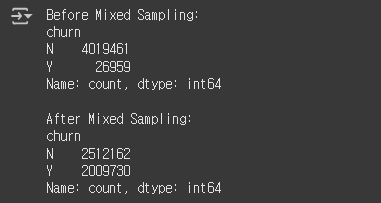

In [ ]:
# 코랩에서 파일 만든 뒤, 필자의 C드라이브 파일로 옮김.

csv_path = "/content/drive/MyDrive/Colab Notebooks/data/train_randomunder_smotenc_4_5.csv"
resampled_data.to_csv(csv_path, index=False)

---

### 4. 가중치

가중치는 모델 학습시, <b>class_weights = 'balanced'</b>를 적용

---

### 5. 데이터 불균형 처리 확인

In [15]:
df_1 = pd.read_csv("data/train/train_undersample_4_5.csv")
df_2 = pd.read_csv("data/train/train_smotenc_4_5.csv")
df_3 = pd.read_csv("data/train/train_randomunder_smotenc_4_5.csv")

In [16]:
# 비율 확인
display(df_1['churn'].value_counts(normalize=True) * 100)
display(df_2['churn'].value_counts(normalize=True) * 100)
display(df_3['churn'].value_counts(normalize=True) * 100)

churn
N   50.00
Y   50.00
Name: proportion, dtype: float64

churn
N   50.00
Y   50.00
Name: proportion, dtype: float64

churn
N   55.56
Y   44.44
Name: proportion, dtype: float64

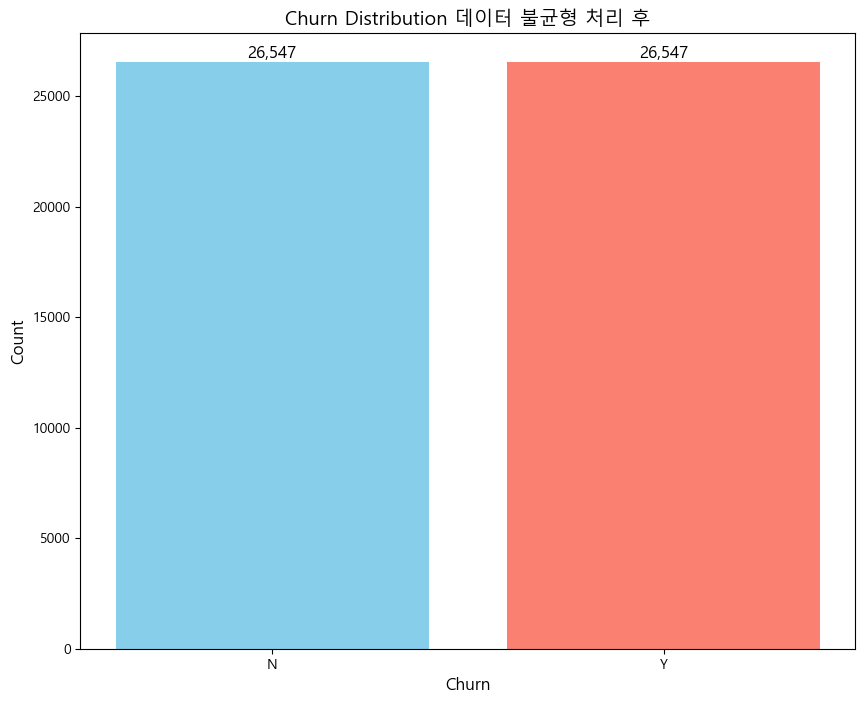

In [17]:
# 랜덤 언더 샘플링
churn_counts = df_1['churn'].value_counts()

plt.figure(figsize=(10, 8))
bars = plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'salmon'])

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():,}', ha='center', va='bottom', fontsize=12)
    
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Churn Distribution 데이터 불균형 처리 후', fontsize=14)
plt.xticks(churn_counts.index, labels=[str(i) for i in churn_counts.index])

plt.show()


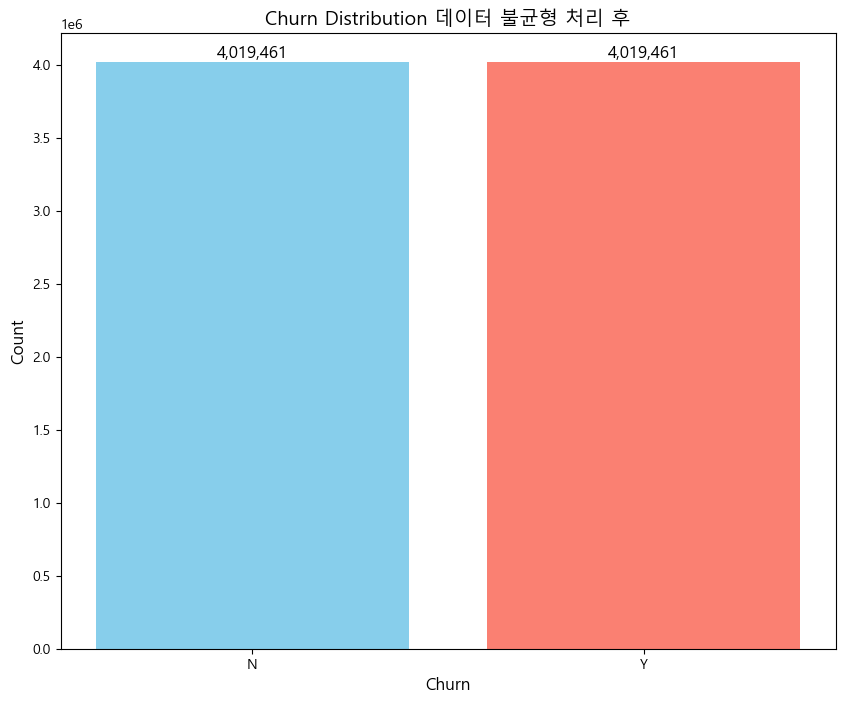

In [15]:
# SMOTE-NC
churn_counts = df_2['churn'].value_counts()

plt.figure(figsize=(10, 8))
bars = plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'salmon'])

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():,}', ha='center', va='bottom', fontsize=12)

plt.xlabel('Churn', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Churn Distribution 데이터 불균형 처리 후', fontsize=14)
plt.xticks(churn_counts.index, labels=[str(i) for i in churn_counts.index])

plt.show()


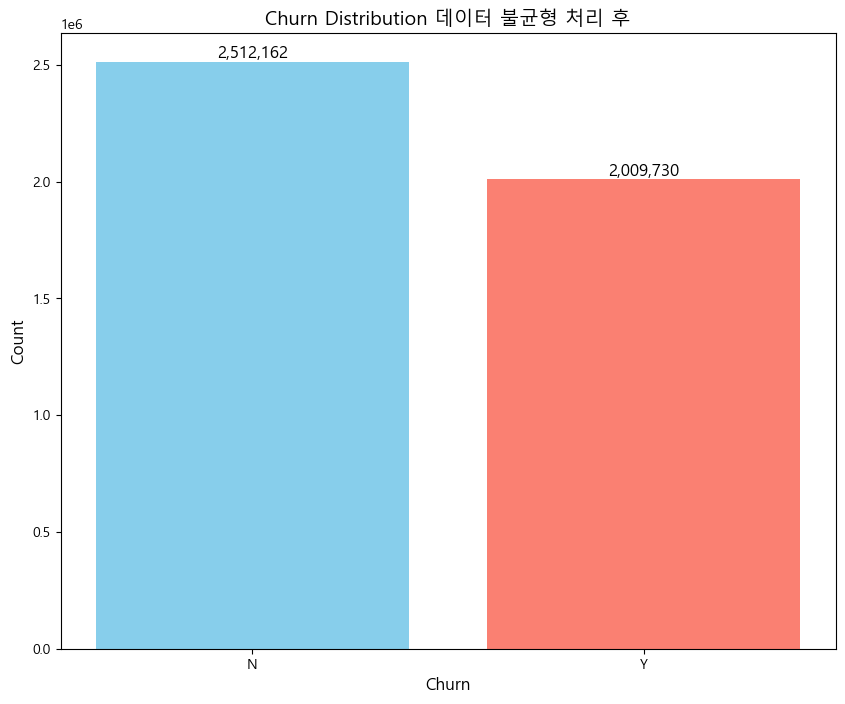

In [16]:
# SMOTE-NC + 랜덤 언더 샘플링
churn_counts = df_3['churn'].value_counts()

plt.figure(figsize=(10, 8))
bars = plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'salmon'])

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():,}', ha='center', va='bottom', fontsize=12)

plt.xlabel('Churn', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Churn Distribution 데이터 불균형 처리 후', fontsize=14)
plt.xticks(churn_counts.index, labels=[str(i) for i in churn_counts.index])

plt.show()


SMOTE-NC와 SMOTE-NC + 랜덤 언더 샘플링한거 반올림

In [6]:
# SMOTE-NC
df_2['TV_I_CNT'] = df_2['TV_I_CNT'].round()

In [7]:
# SMOTE-NC + 랜덤 언더 샘플링
df_3['TV_I_CNT'] = df_3['TV_I_CNT'].round()

INHOME_RATE를 object형으로

In [18]:
df_1['INHOME_RATE'] = df_1['INHOME_RATE'].astype(str)

원래 데이터 폴더에 있는 것들을 삭제하고 해당 파일들을 다시 저장

In [23]:
df_1.to_csv("data/train/train_undersample_4_5.csv", index=False)

In [36]:
df_2.to_csv("data/train/train_smotenc_4_5.csv", index=False)

In [37]:
df_3.to_csv("data/train/train_randomunder_smotenc_4_5.csv", index=False)

##### df_1(랜덤 언더 샘플링) 확인

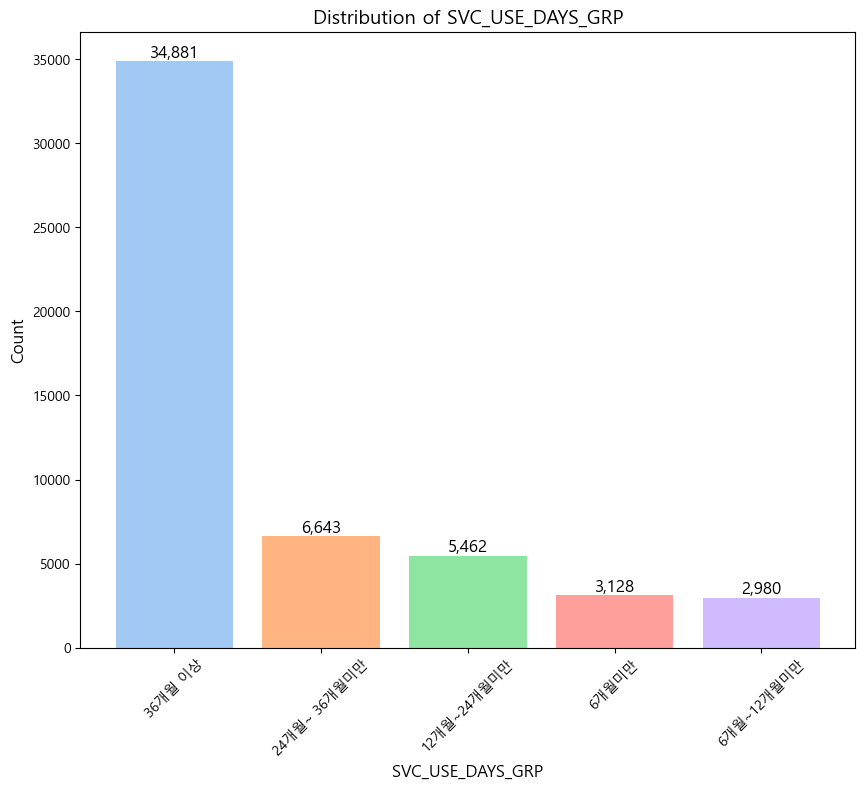

<Figure size 640x480 with 0 Axes>

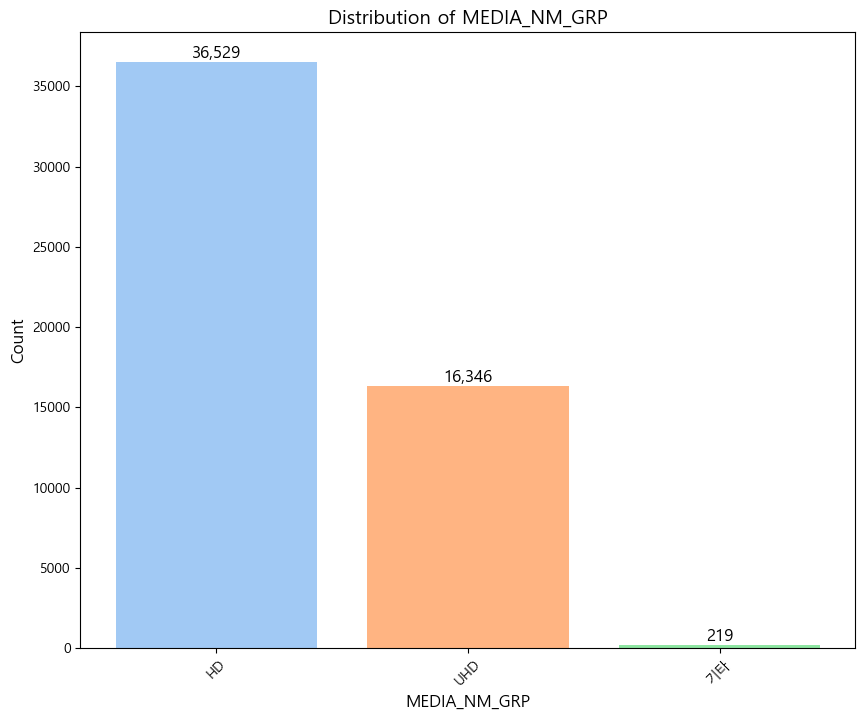

<Figure size 640x480 with 0 Axes>

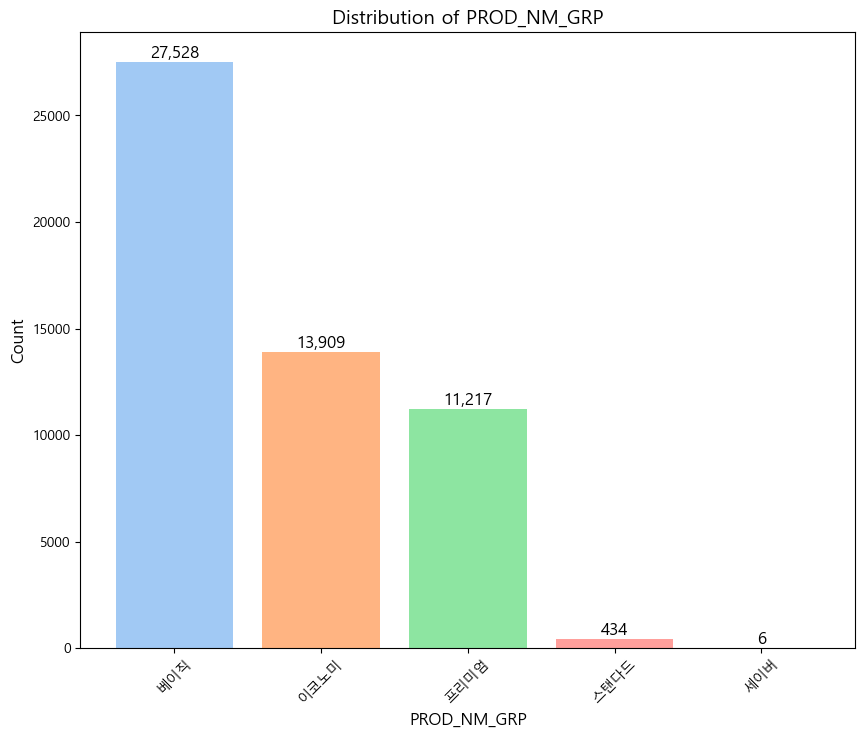

<Figure size 640x480 with 0 Axes>

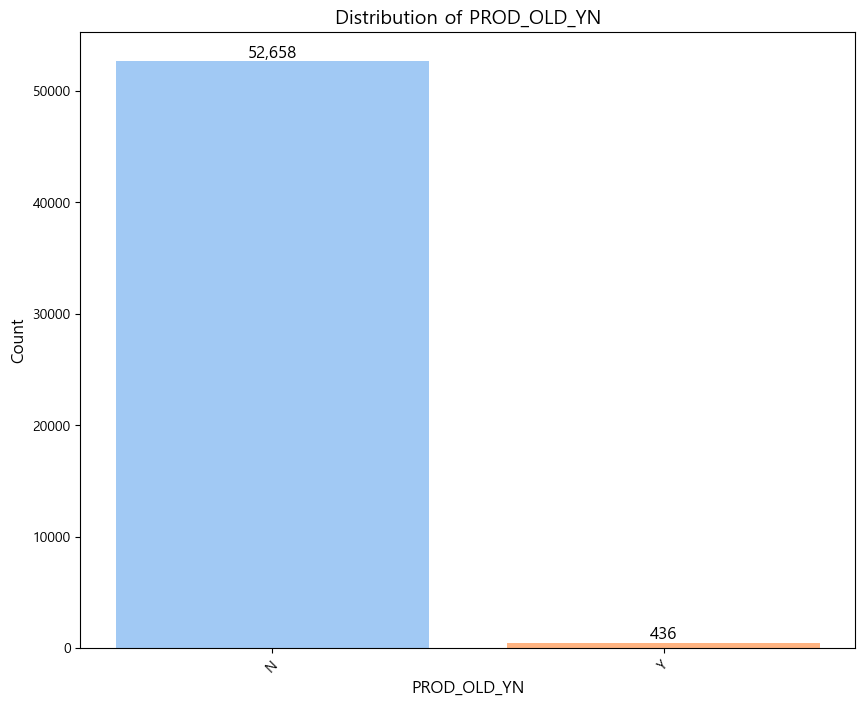

<Figure size 640x480 with 0 Axes>

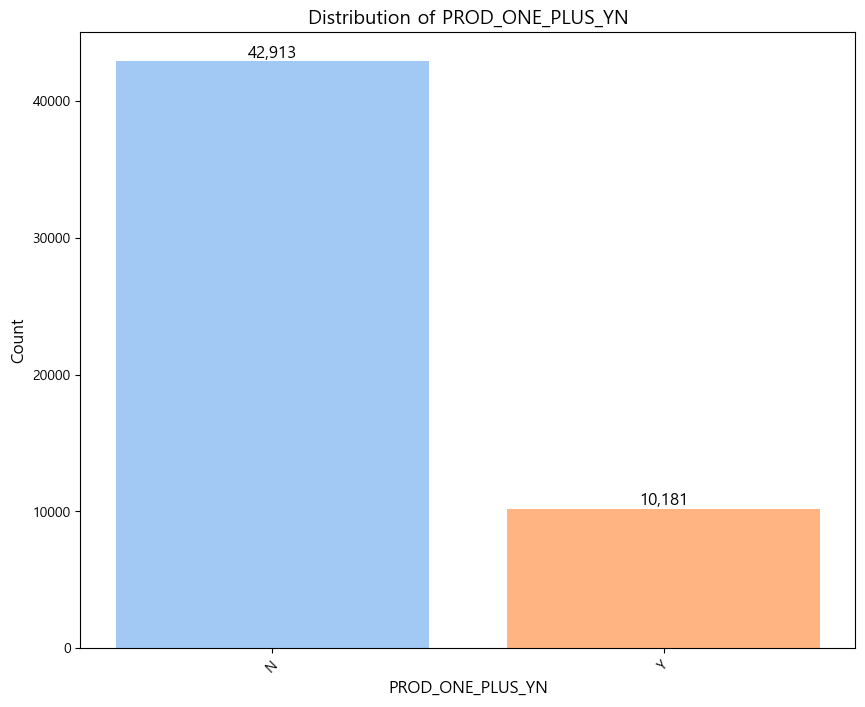

<Figure size 640x480 with 0 Axes>

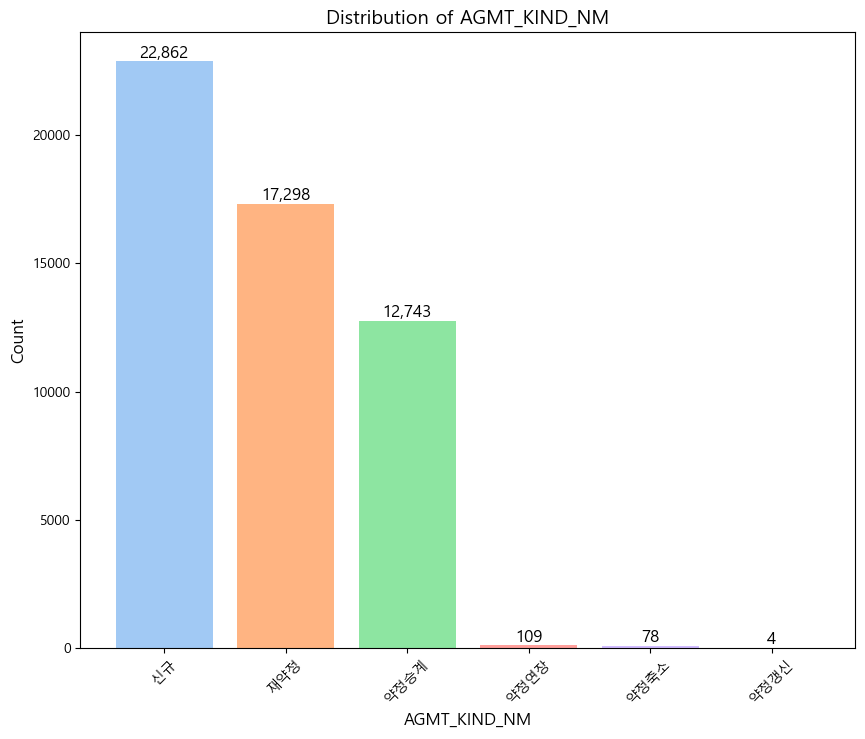

<Figure size 640x480 with 0 Axes>

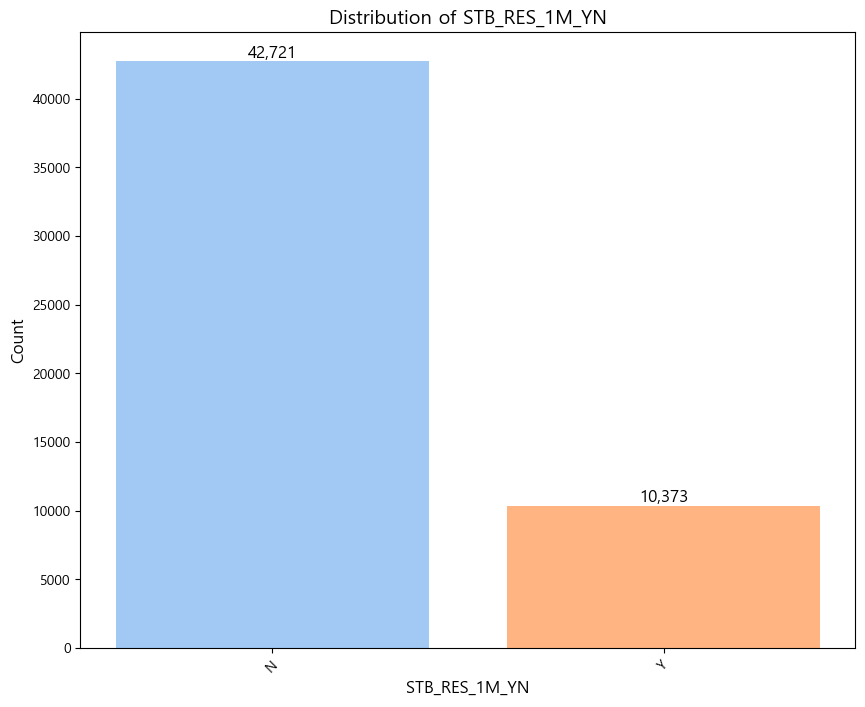

<Figure size 640x480 with 0 Axes>

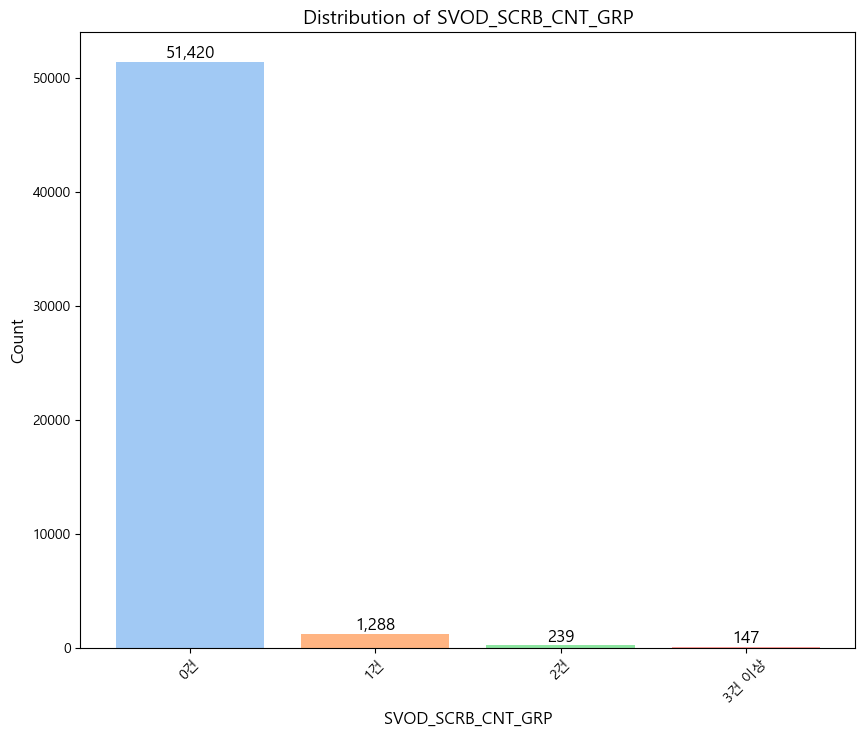

<Figure size 640x480 with 0 Axes>

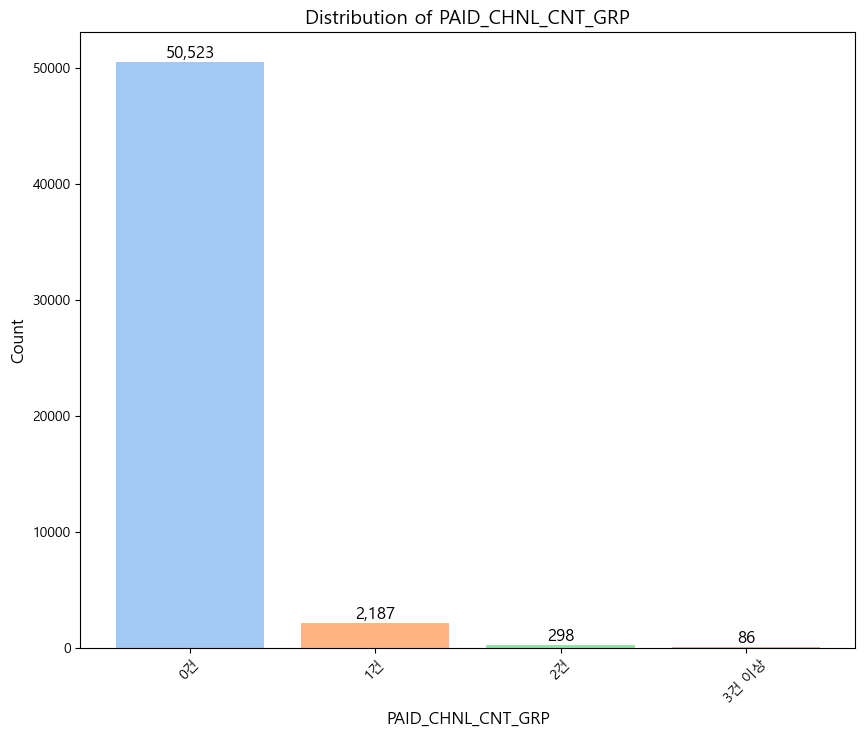

<Figure size 640x480 with 0 Axes>

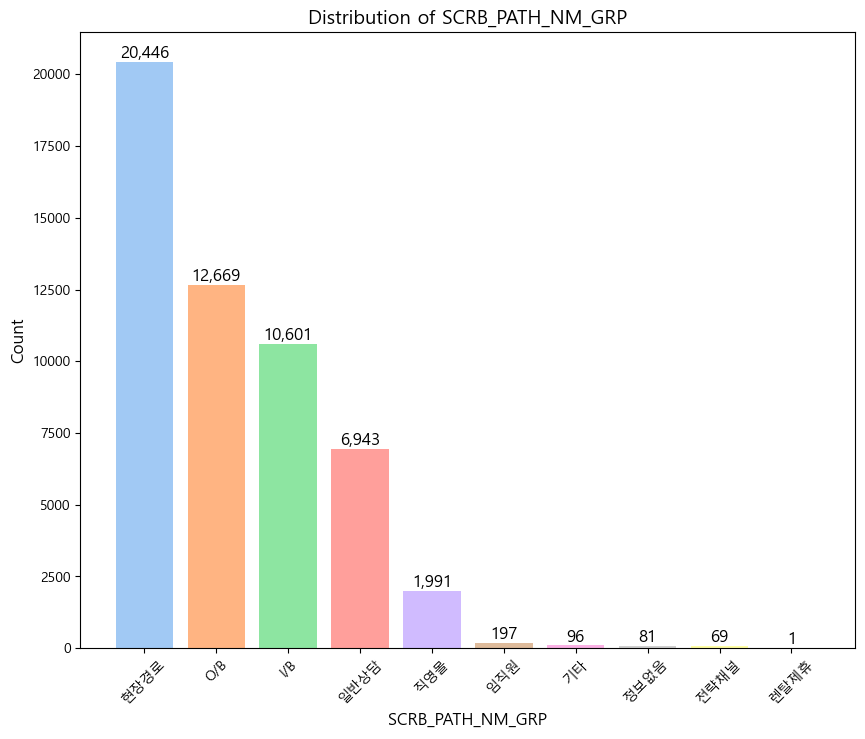

<Figure size 640x480 with 0 Axes>

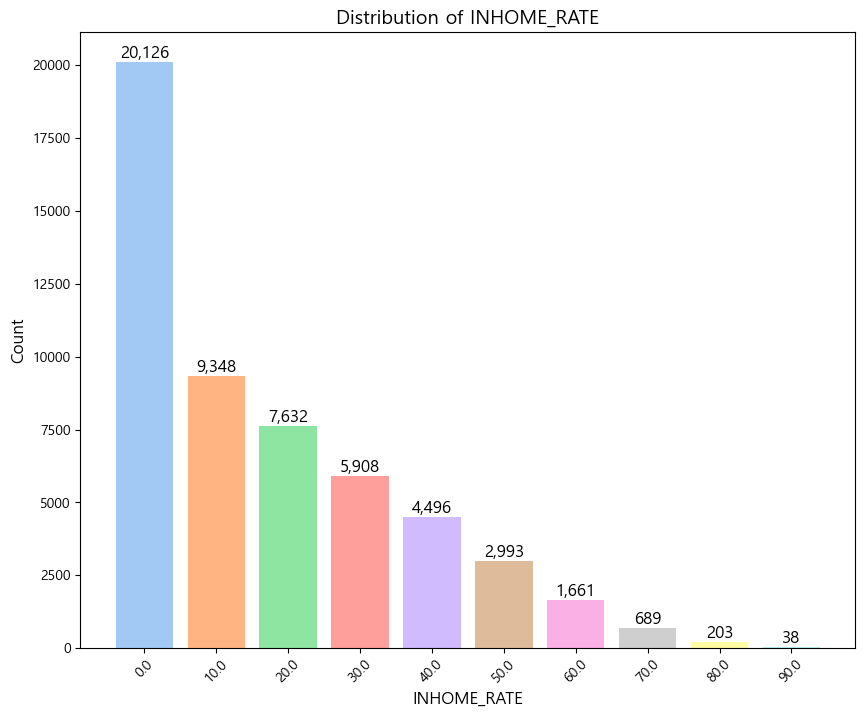

<Figure size 640x480 with 0 Axes>

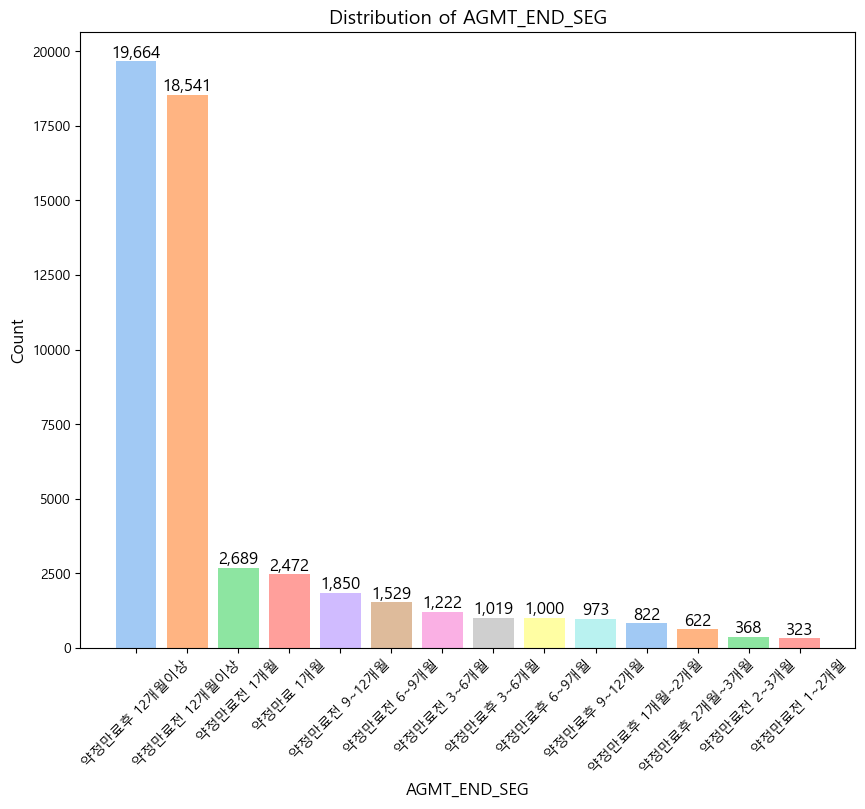

<Figure size 640x480 with 0 Axes>

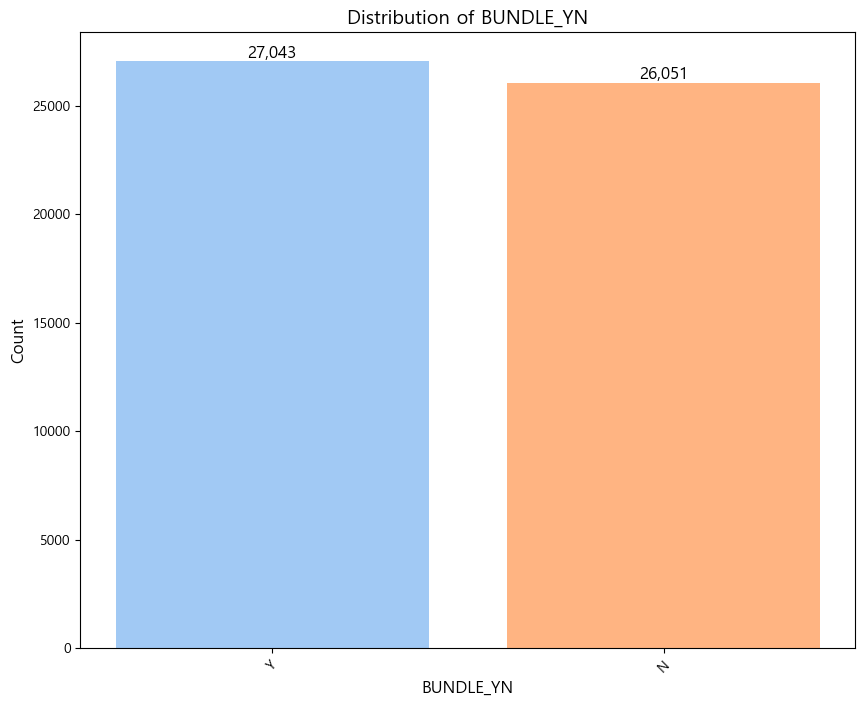

<Figure size 640x480 with 0 Axes>

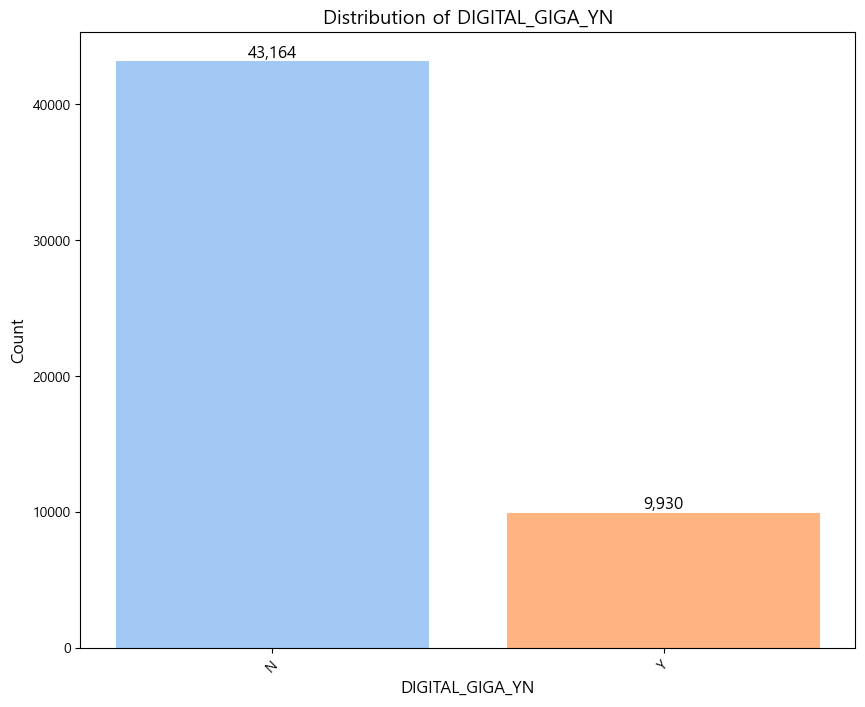

<Figure size 640x480 with 0 Axes>

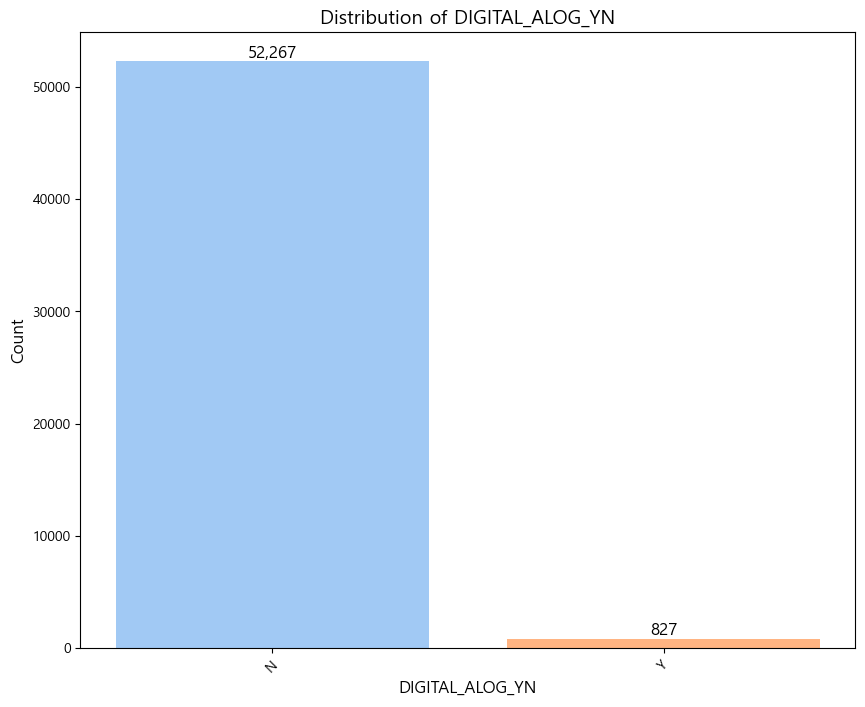

<Figure size 640x480 with 0 Axes>

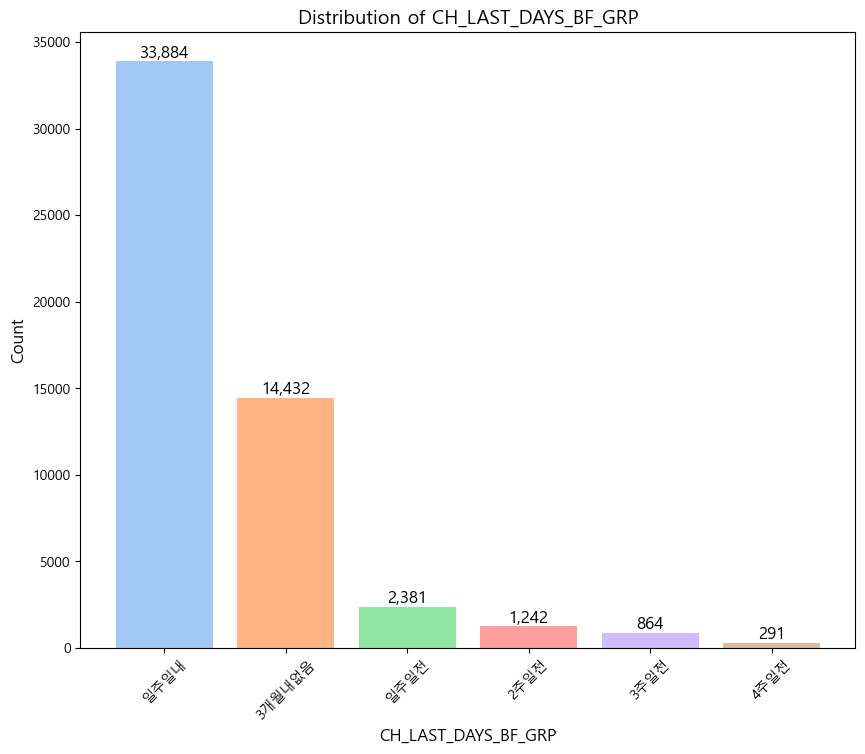

<Figure size 640x480 with 0 Axes>

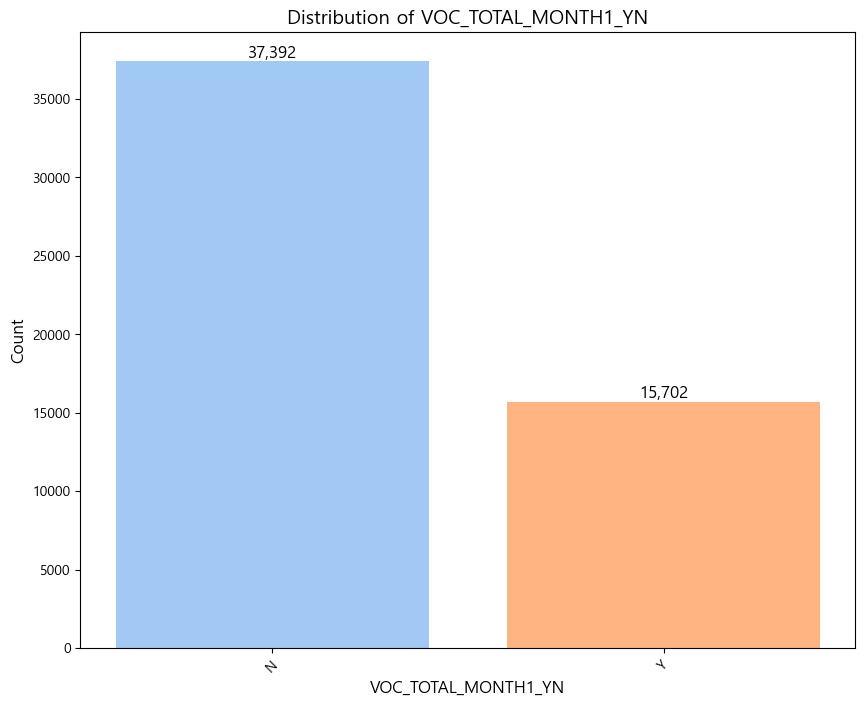

<Figure size 640x480 with 0 Axes>

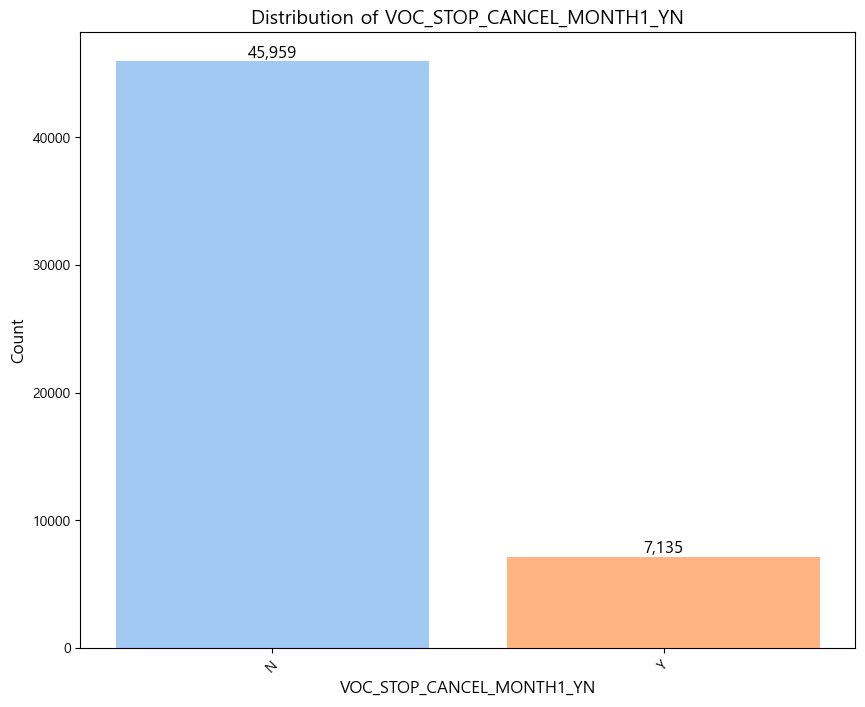

<Figure size 640x480 with 0 Axes>

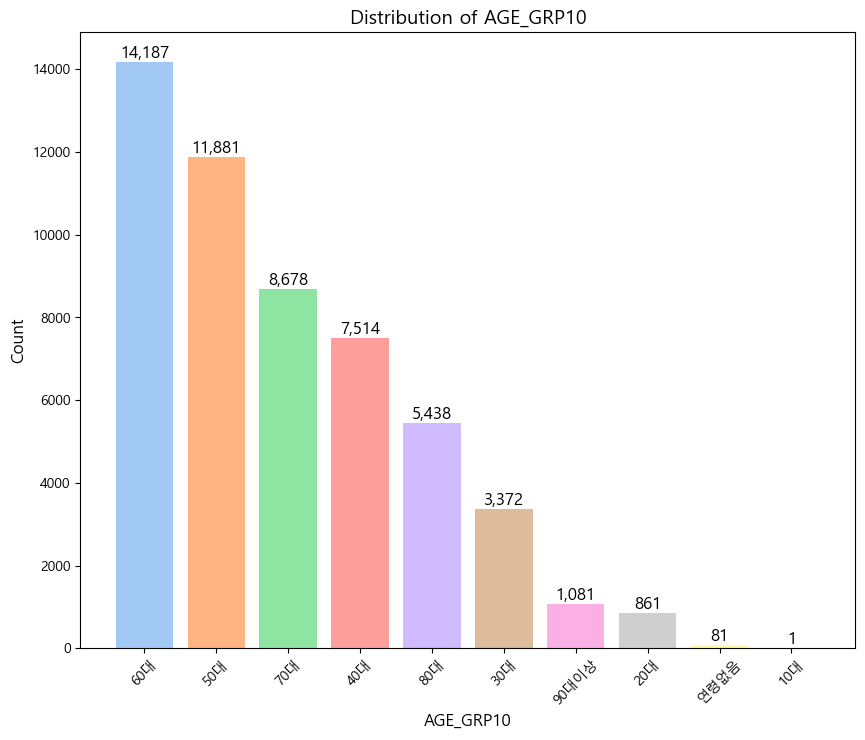

<Figure size 640x480 with 0 Axes>

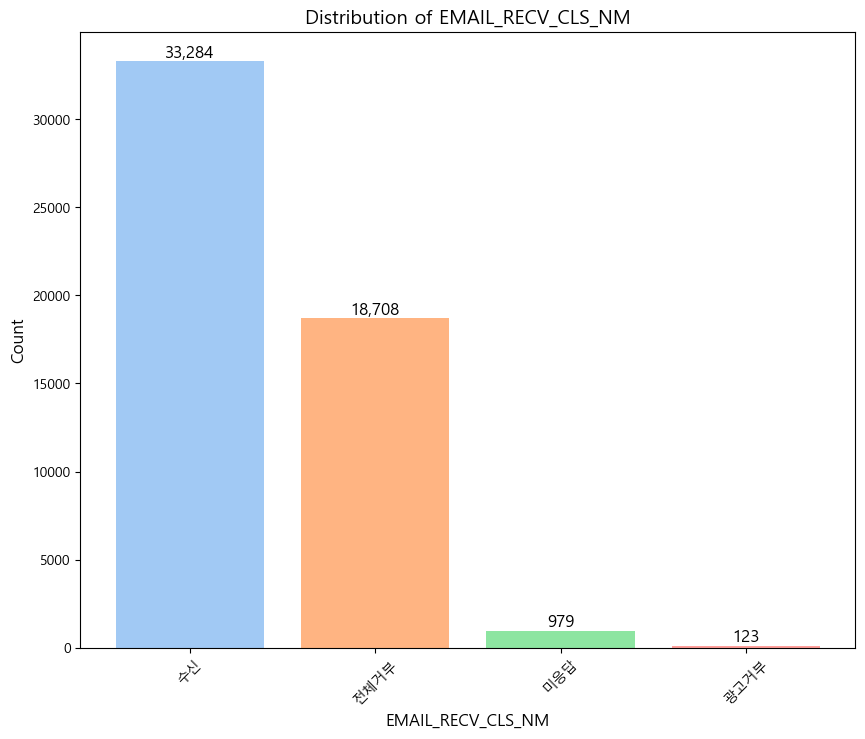

<Figure size 640x480 with 0 Axes>

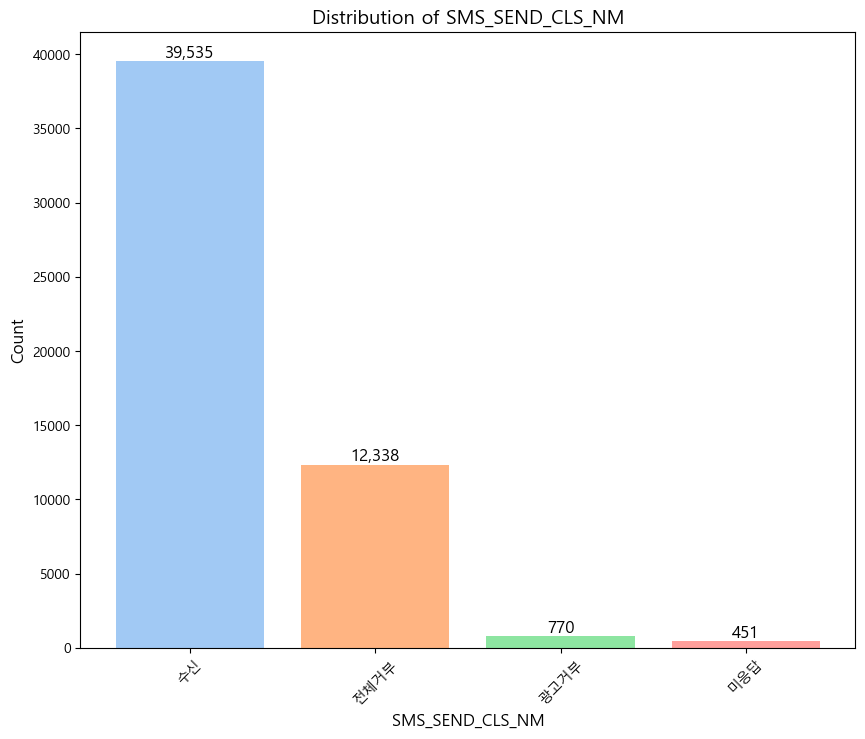

<Figure size 640x480 with 0 Axes>

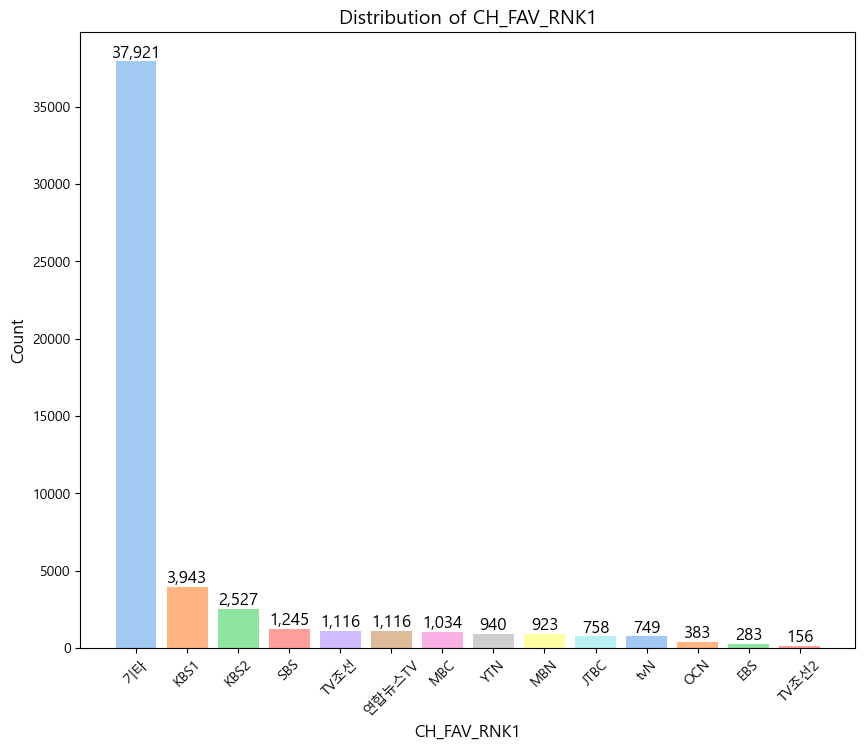

<Figure size 640x480 with 0 Axes>

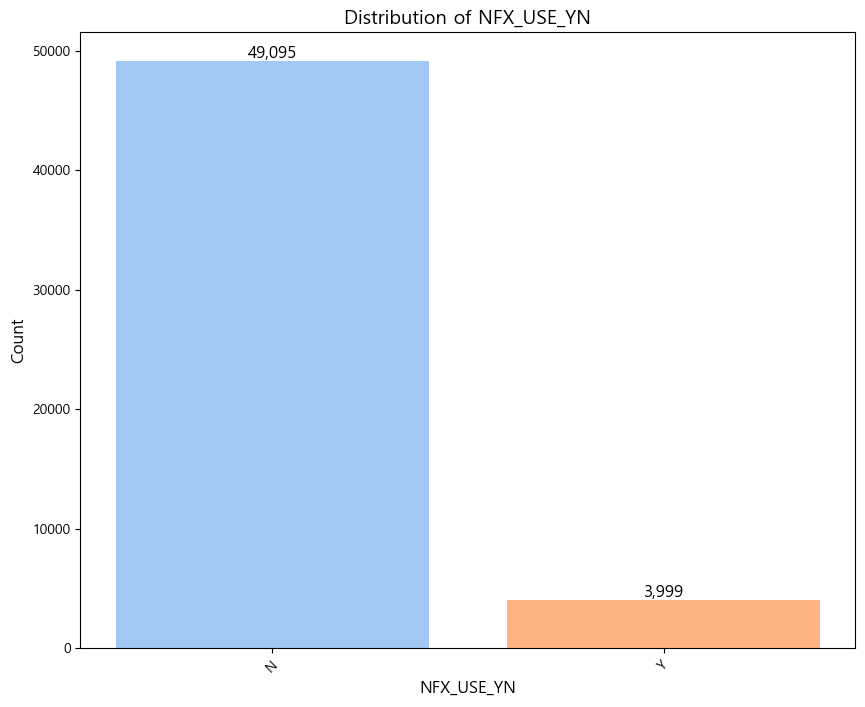

<Figure size 640x480 with 0 Axes>

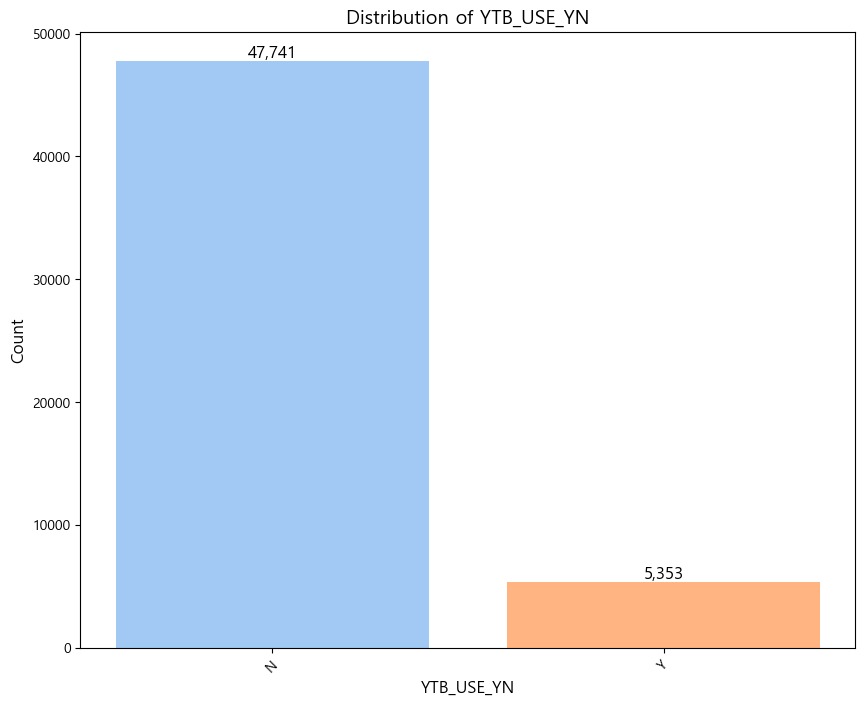

<Figure size 640x480 with 0 Axes>

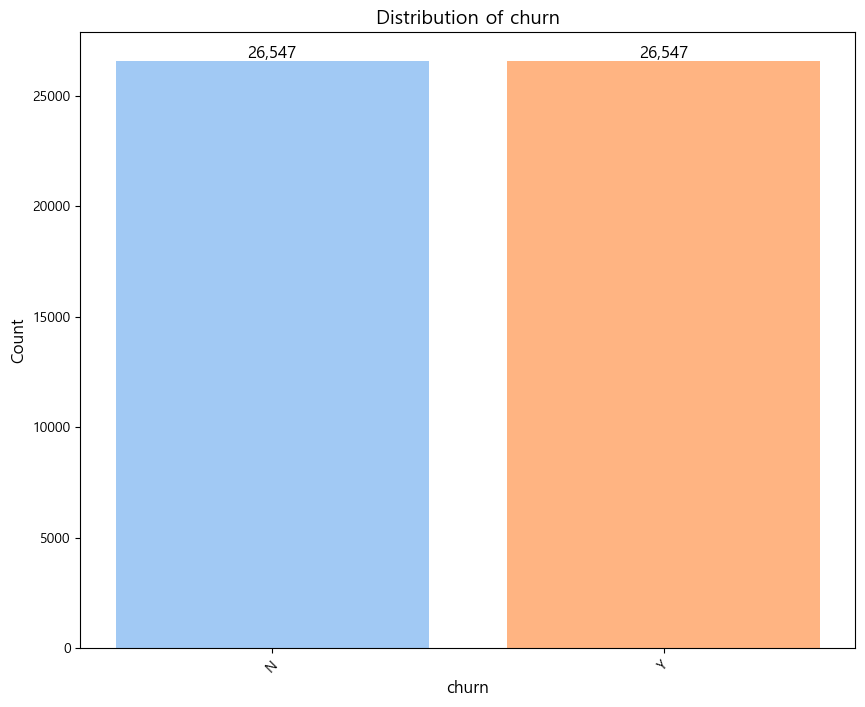

<Figure size 640x480 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

object_columns = df_1.select_dtypes(include=['object']).columns
exclude_cols = ['sha2_hash', 'p_mt', 'AGMT_END_YMD']

palette = sns.color_palette("pastel", 10)

for col in object_columns:
    if col not in exclude_cols:
        plt.figure(figsize=(10, 8))
        value_counts = df_1[col].value_counts()

        bars = plt.bar(value_counts.index, value_counts.values, 
                       color=palette[:len(value_counts)])  

        for bar in bars:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                     f'{bar.get_height():,}', ha='center', va='bottom', fontsize=12)

        plt.xlabel(col, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.title(f'Distribution of {col}', fontsize=14)
        plt.xticks(rotation=45)

        plt.show()
        plt.clf()


#### df_2 SMOTE-NC 확인

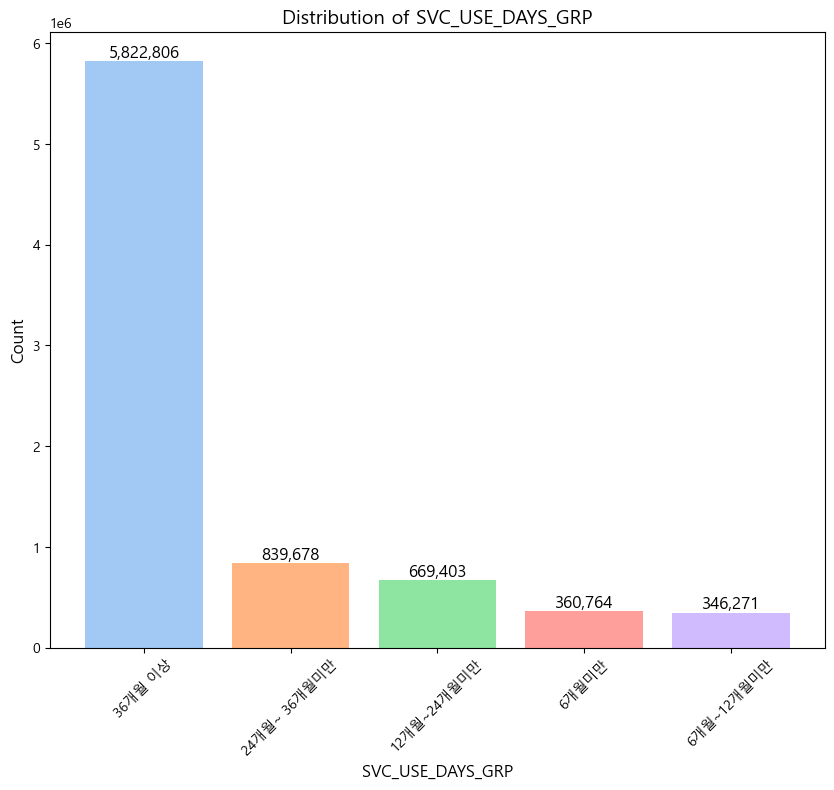

<Figure size 640x480 with 0 Axes>

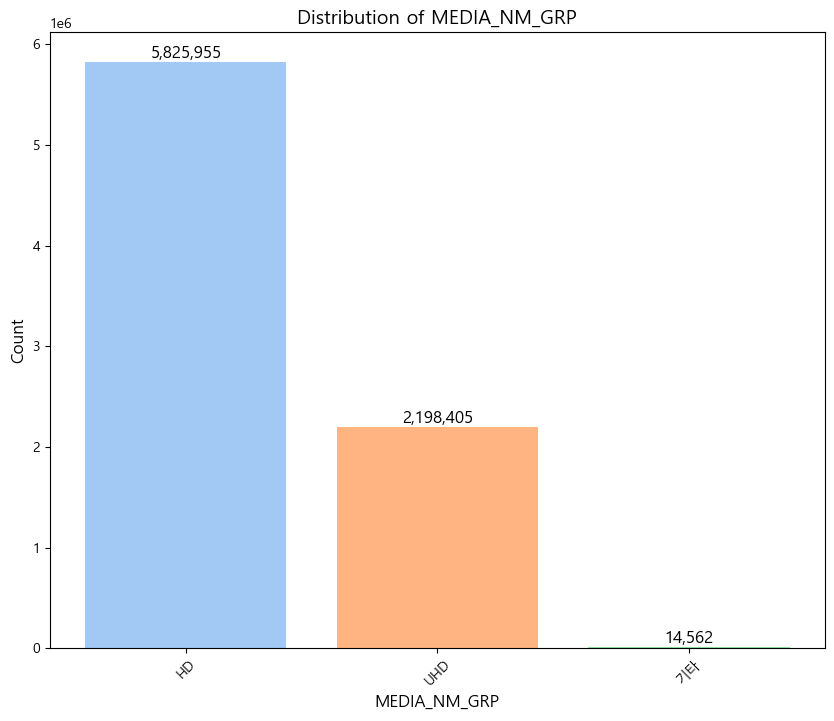

<Figure size 640x480 with 0 Axes>

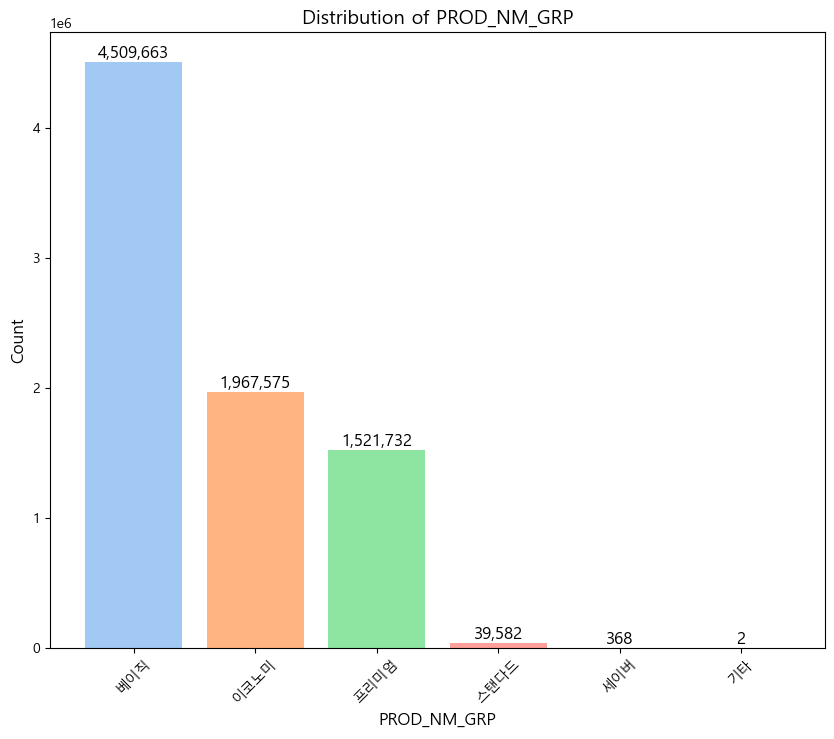

<Figure size 640x480 with 0 Axes>

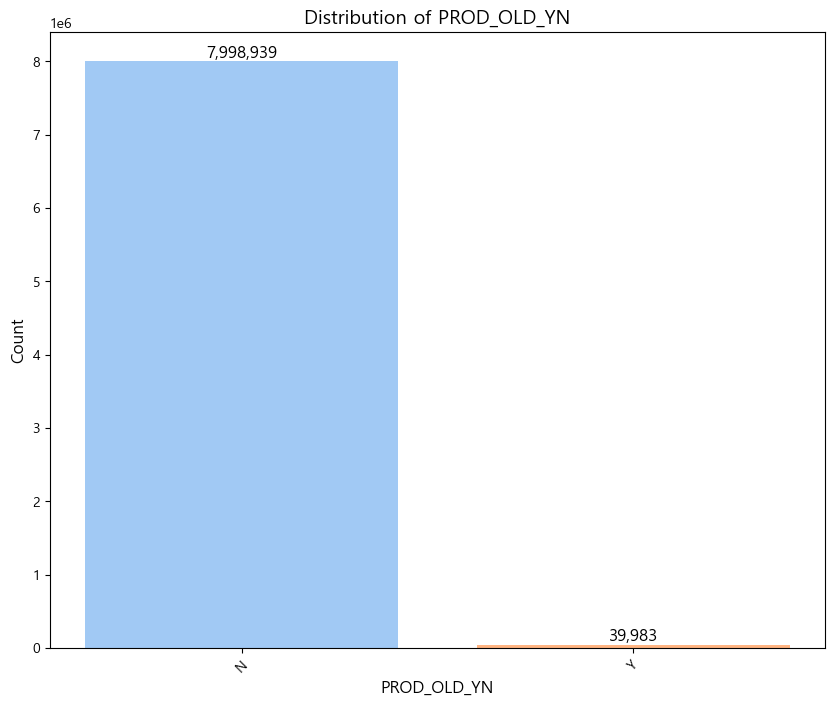

<Figure size 640x480 with 0 Axes>

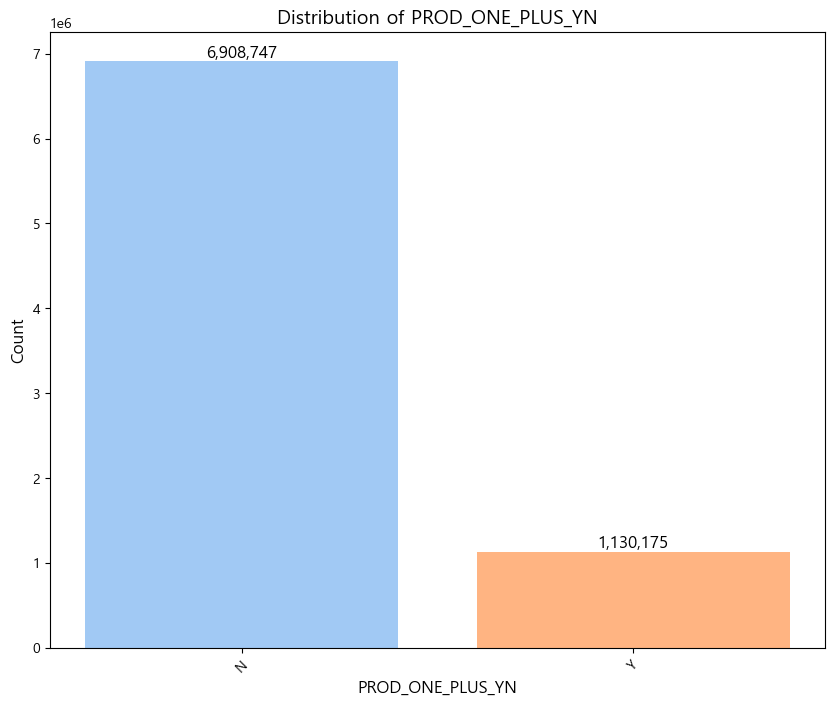

<Figure size 640x480 with 0 Axes>

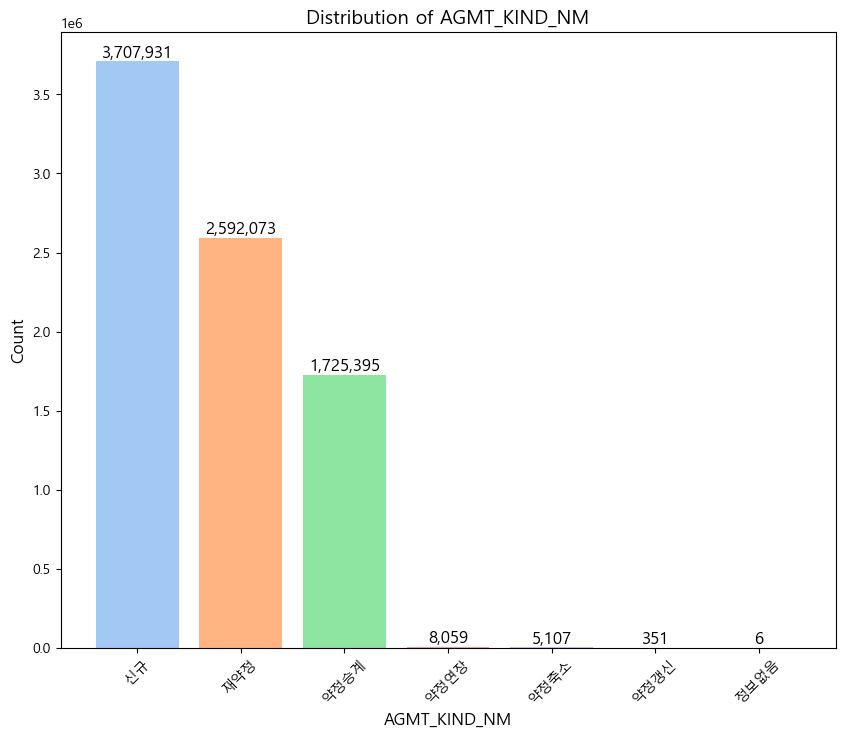

<Figure size 640x480 with 0 Axes>

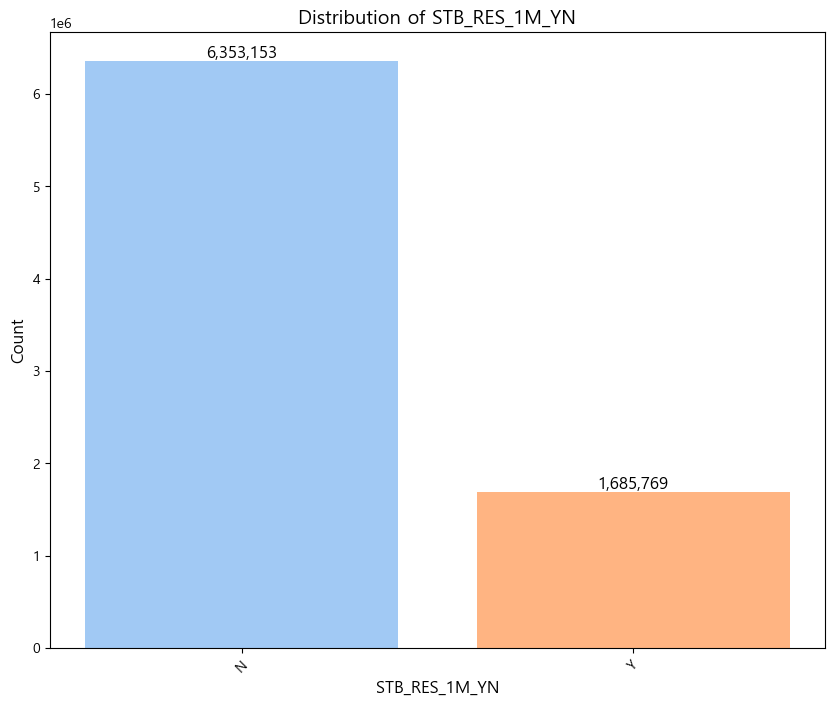

<Figure size 640x480 with 0 Axes>

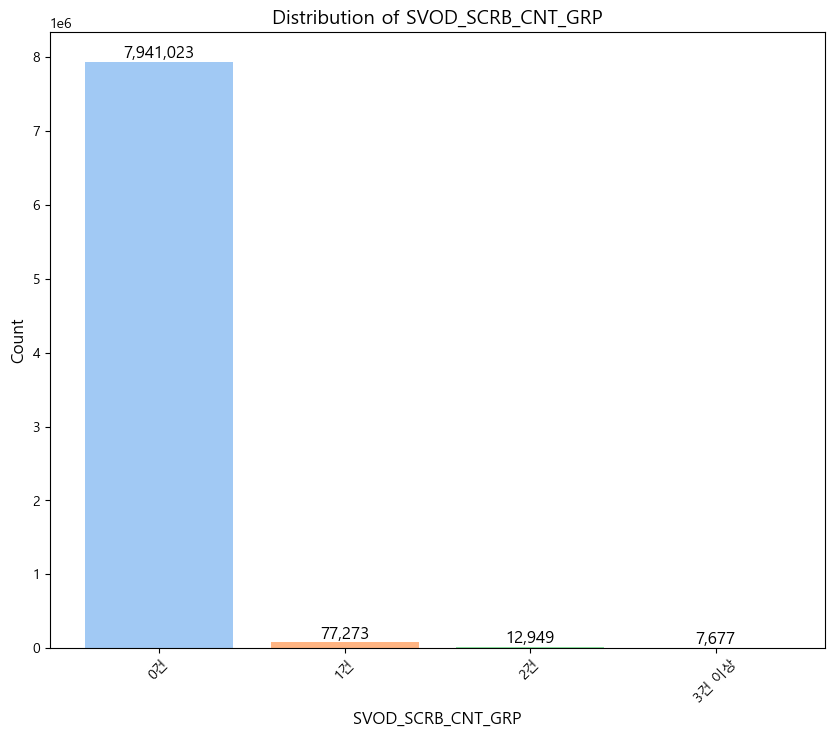

<Figure size 640x480 with 0 Axes>

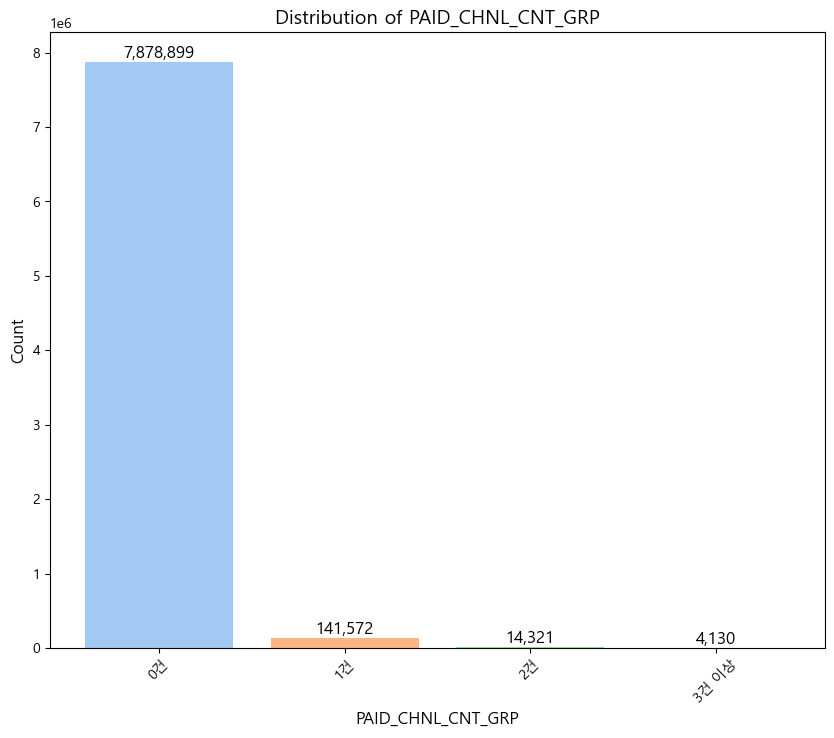

<Figure size 640x480 with 0 Axes>

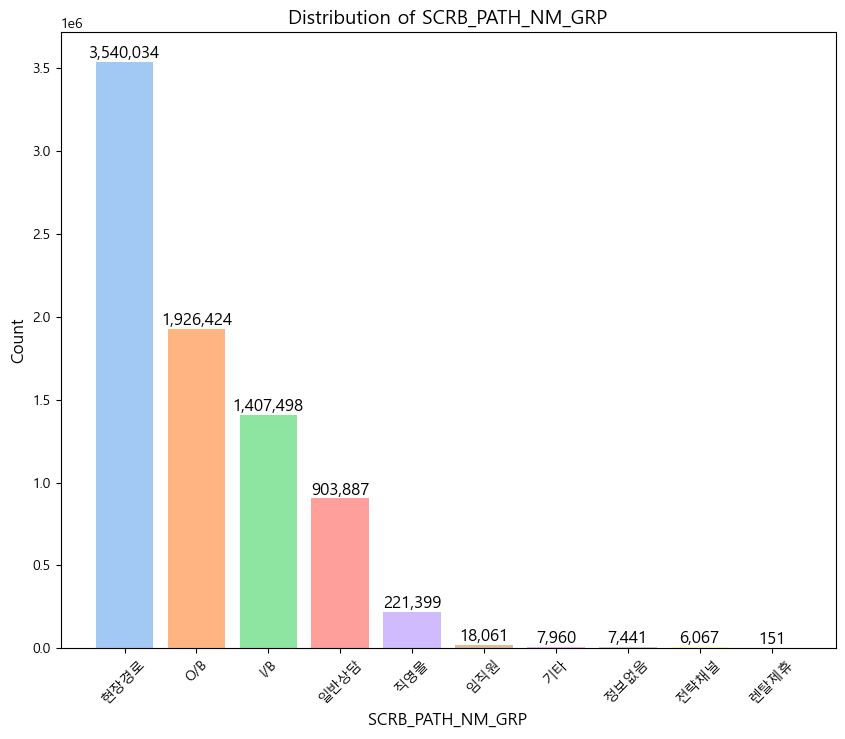

<Figure size 640x480 with 0 Axes>

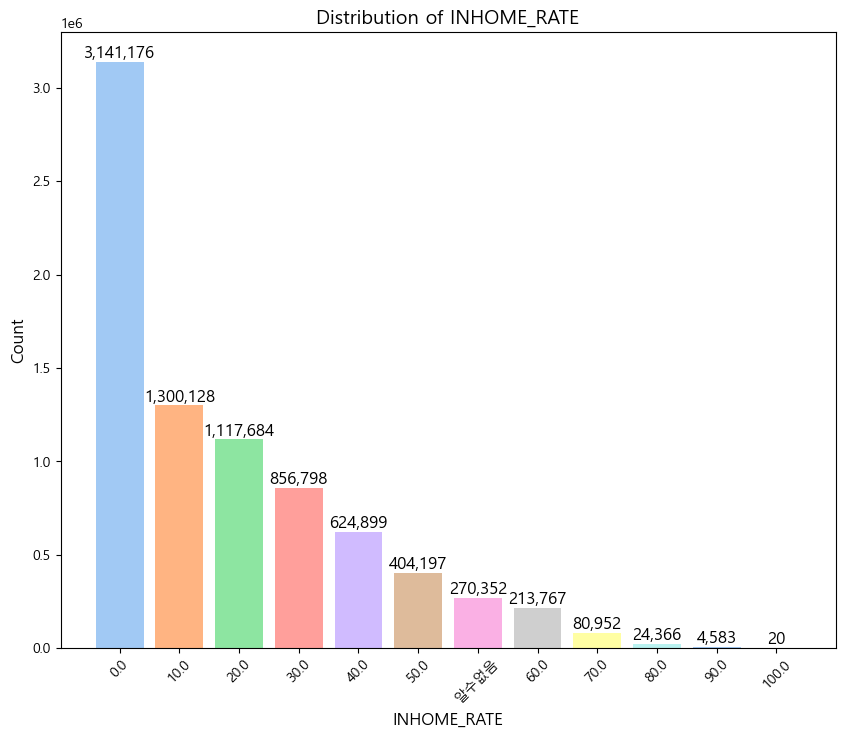

<Figure size 640x480 with 0 Axes>

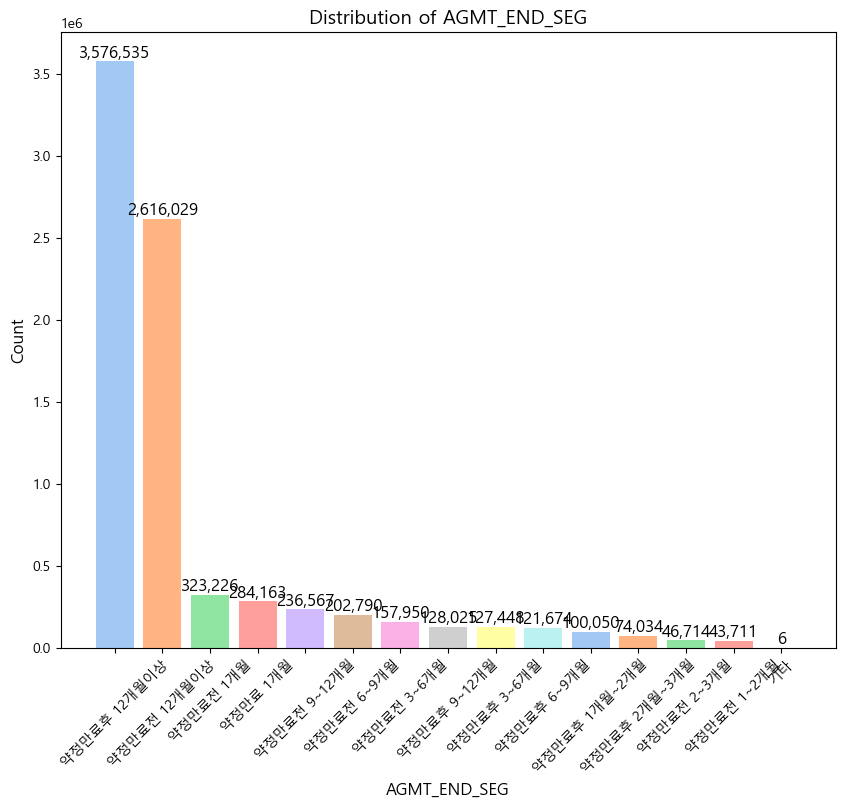

<Figure size 640x480 with 0 Axes>

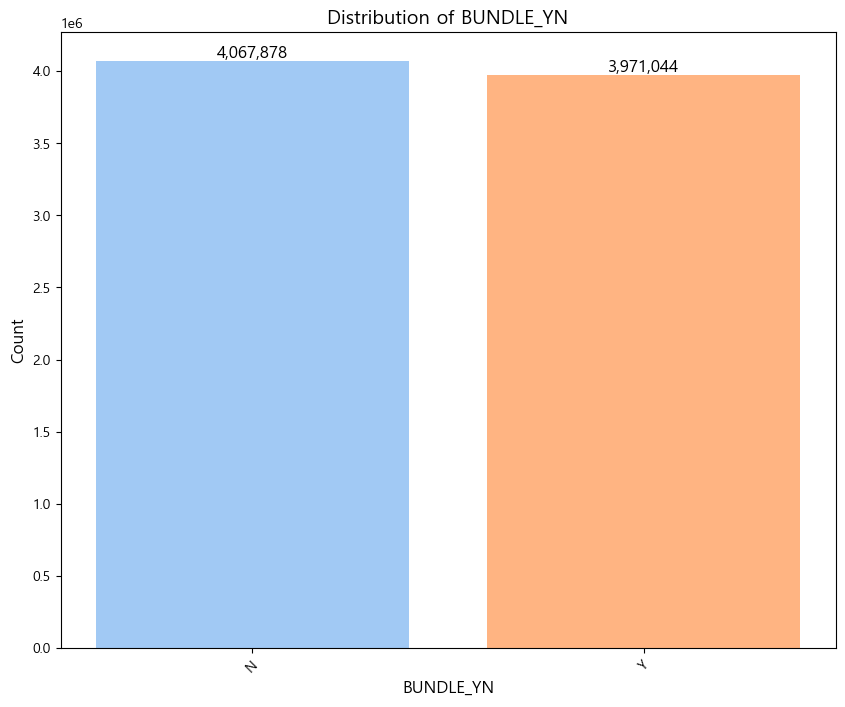

<Figure size 640x480 with 0 Axes>

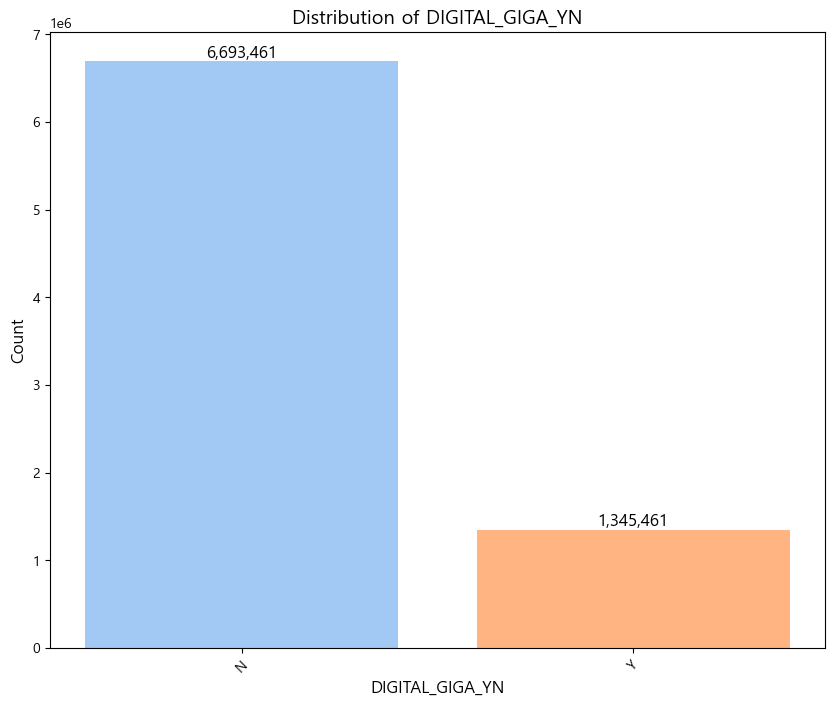

<Figure size 640x480 with 0 Axes>

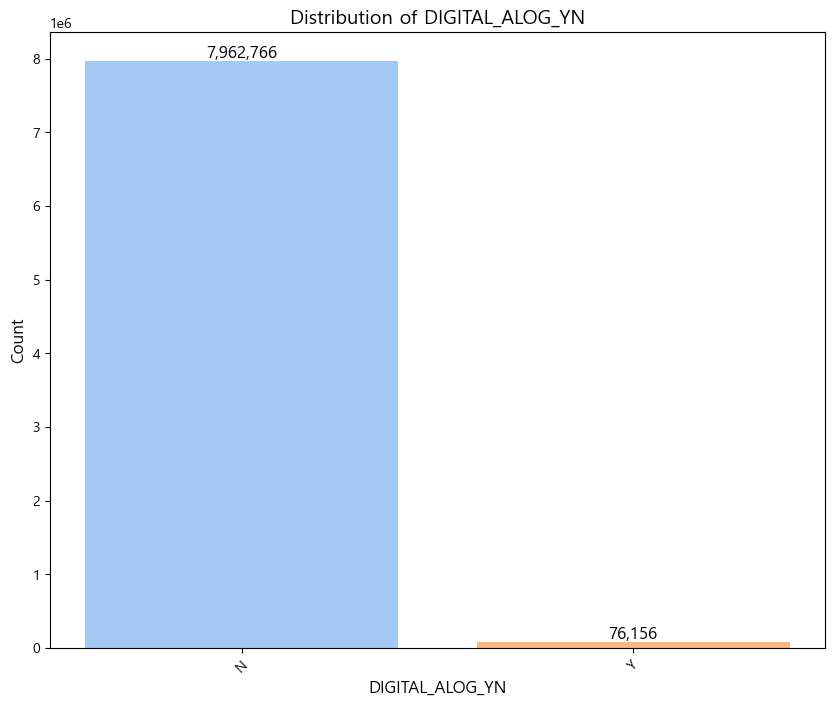

<Figure size 640x480 with 0 Axes>

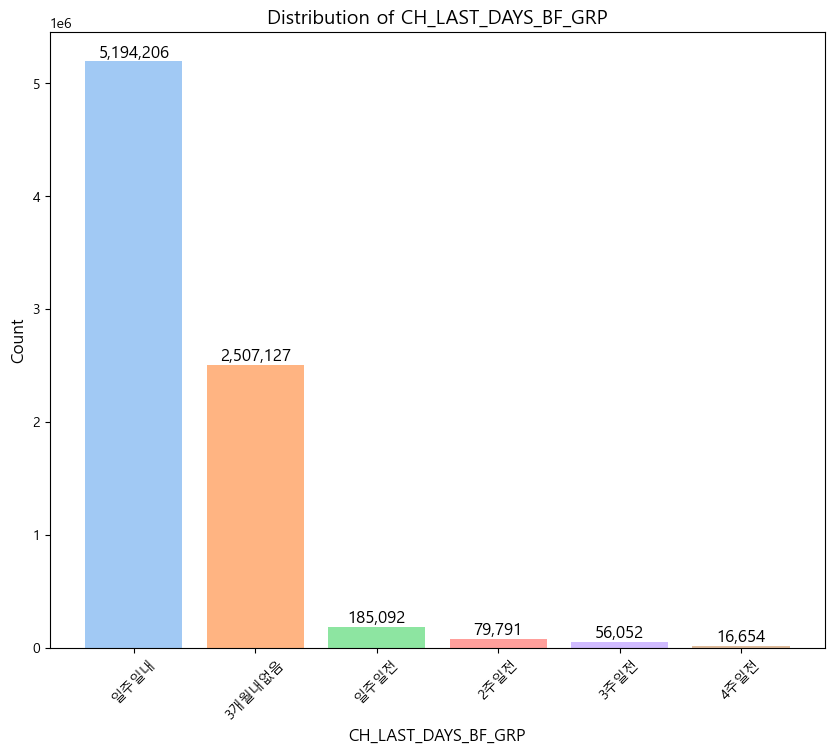

<Figure size 640x480 with 0 Axes>

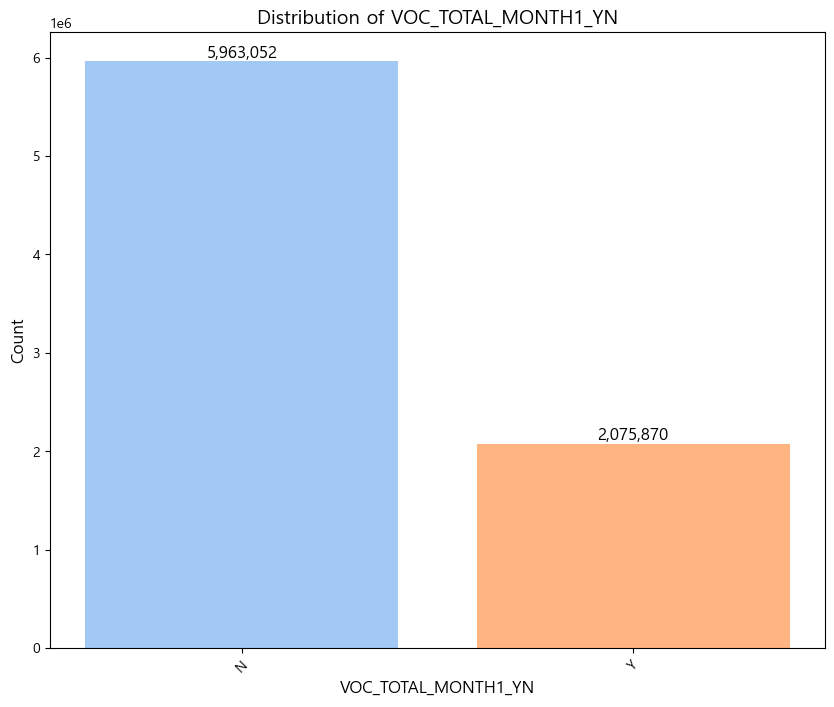

<Figure size 640x480 with 0 Axes>

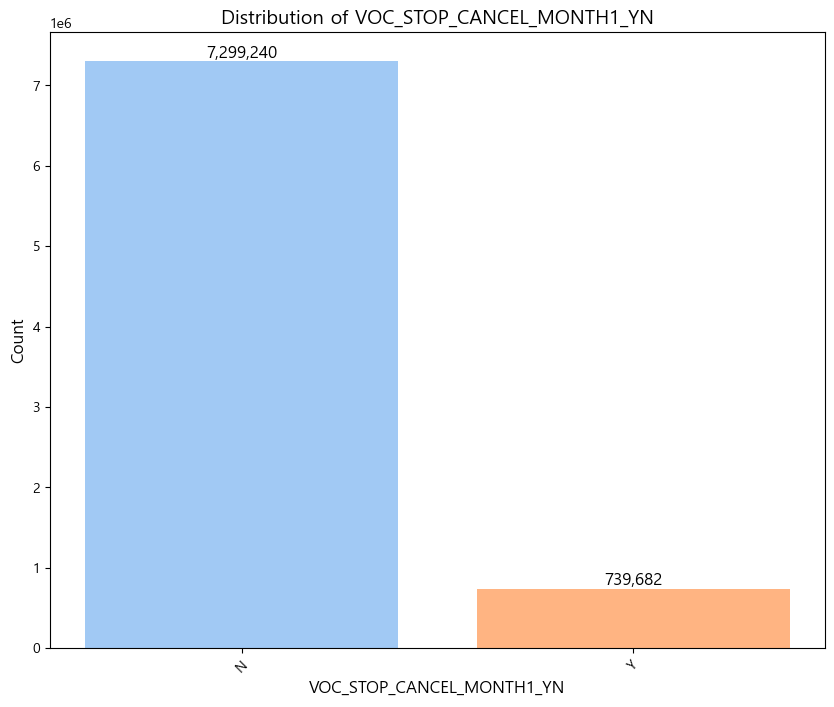

<Figure size 640x480 with 0 Axes>

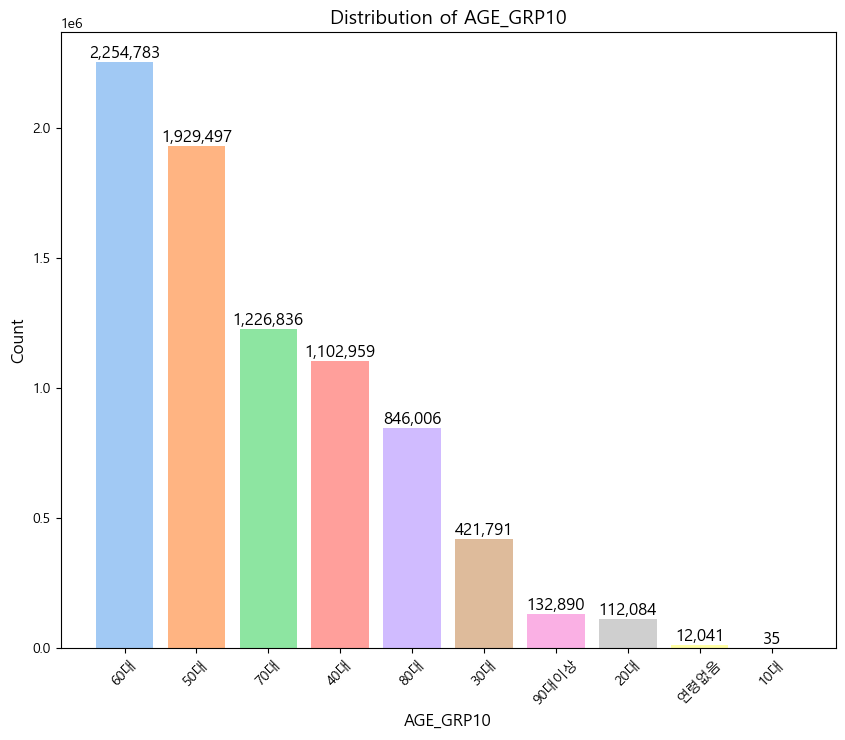

<Figure size 640x480 with 0 Axes>

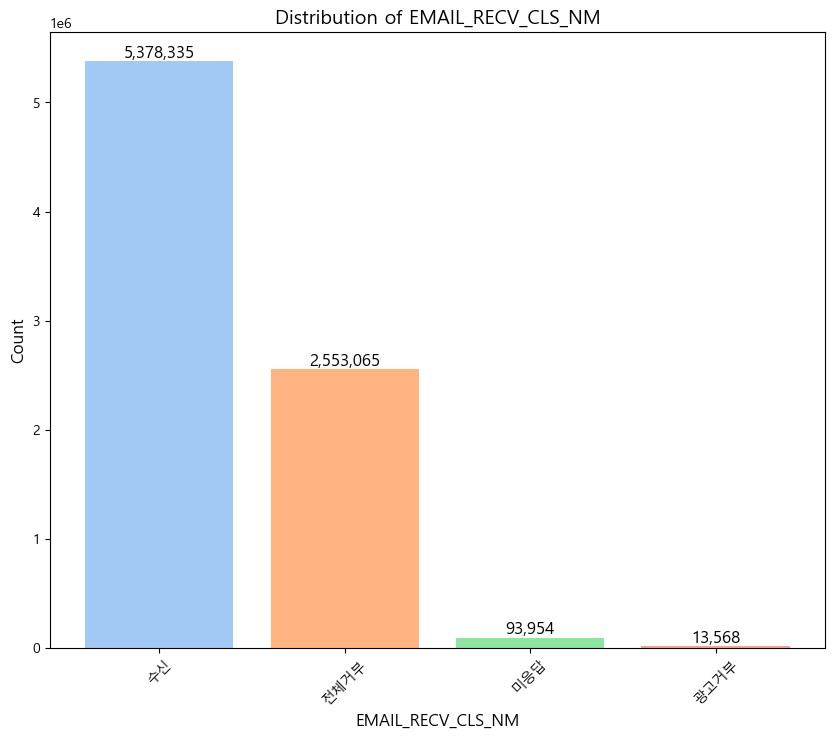

<Figure size 640x480 with 0 Axes>

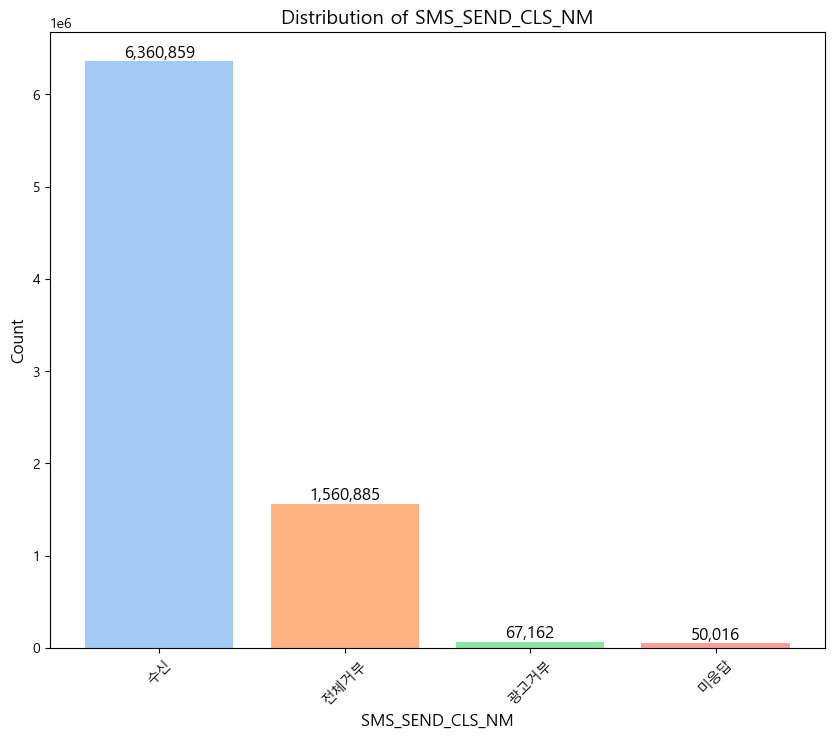

<Figure size 640x480 with 0 Axes>

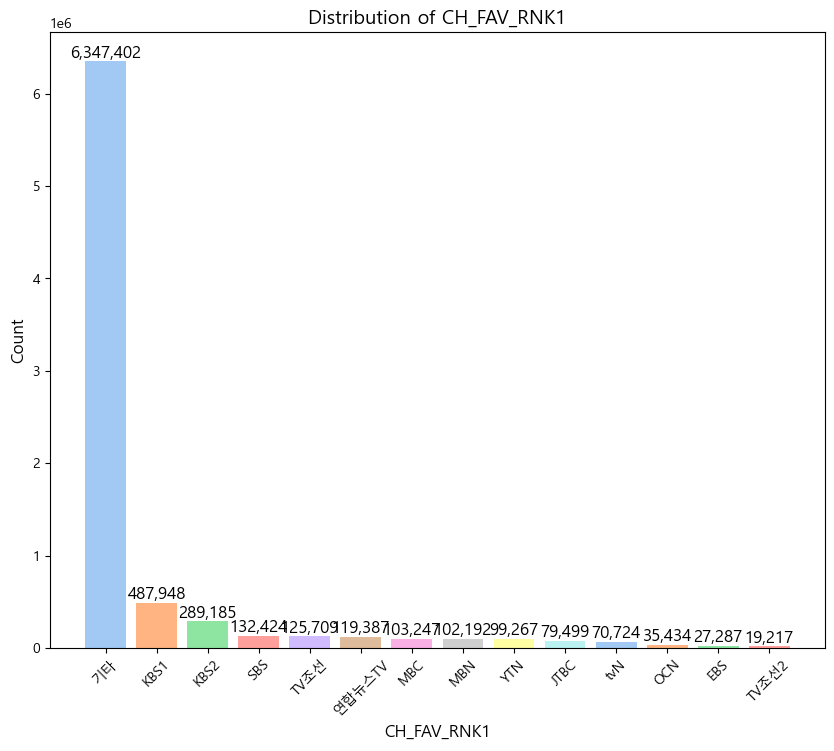

<Figure size 640x480 with 0 Axes>

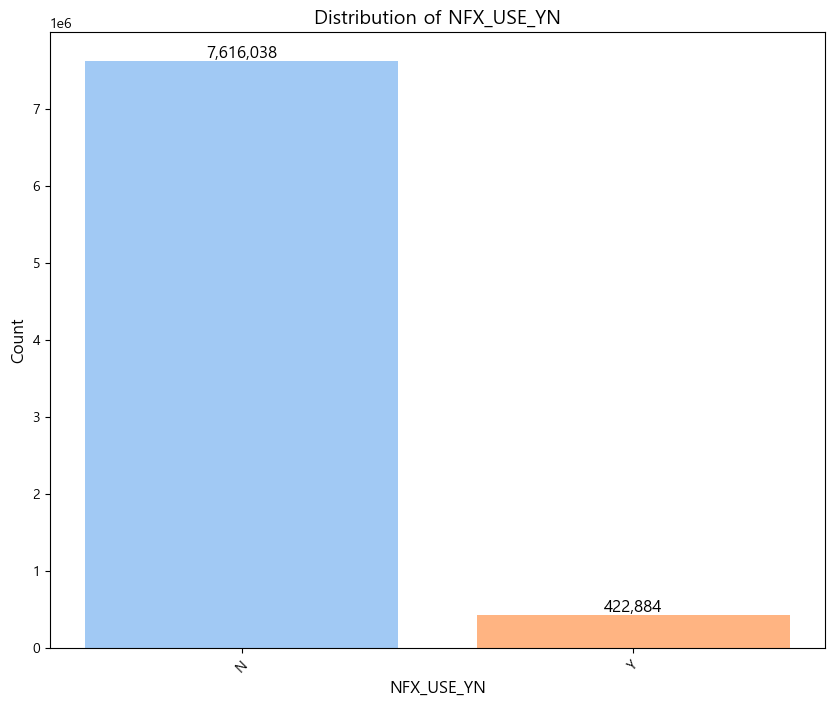

<Figure size 640x480 with 0 Axes>

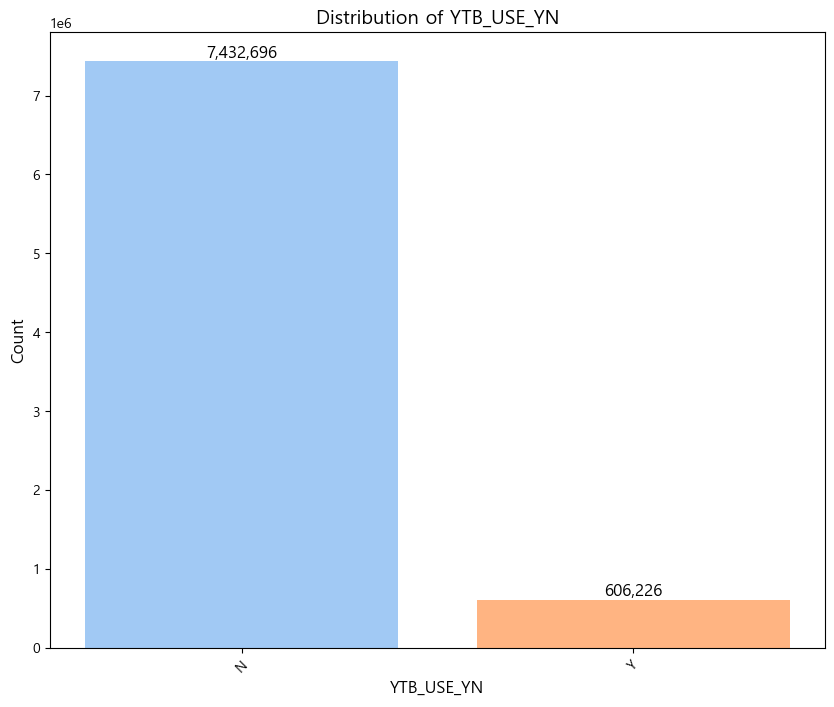

<Figure size 640x480 with 0 Axes>

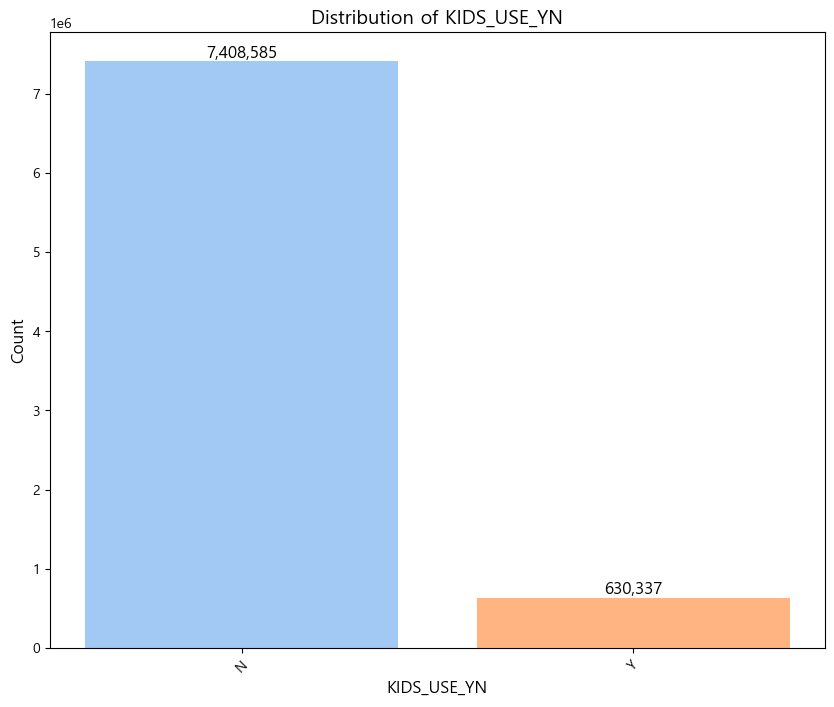

<Figure size 640x480 with 0 Axes>

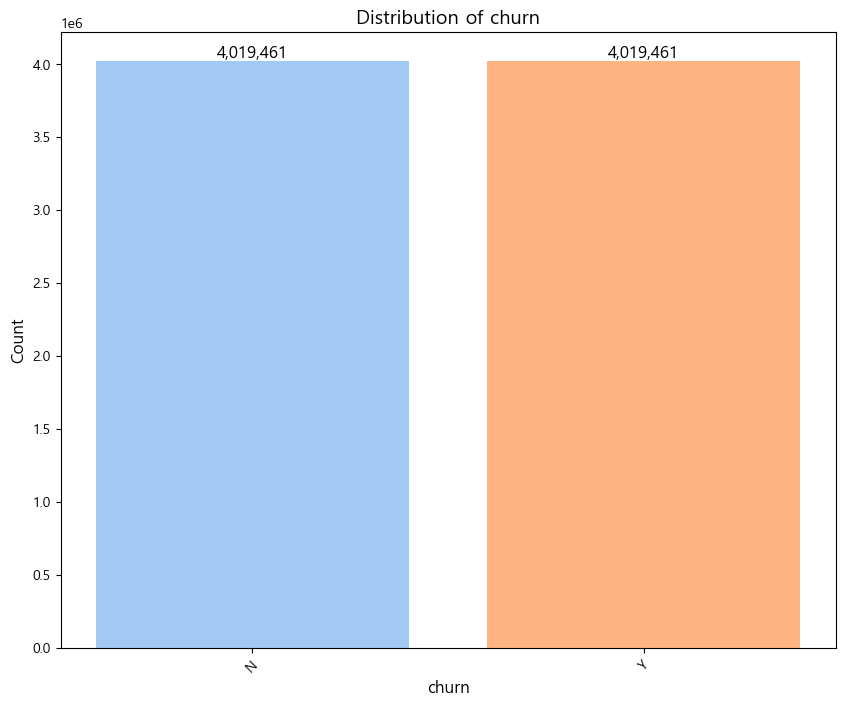

<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

object_columns = df_2.select_dtypes(include=['object']).columns
exclude_cols = ['sha2_hash', 'p_mt', 'AGMT_END_YMD']

palette = sns.color_palette("pastel", 10)

for col in object_columns:
    if col not in exclude_cols:
        plt.figure(figsize=(10, 8))
        value_counts = df_2[col].value_counts()

        bars = plt.bar(value_counts.index, value_counts.values, 
                       color=palette[:len(value_counts)])  

        for bar in bars:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                     f'{bar.get_height():,}', ha='center', va='bottom', fontsize=12)

        plt.xlabel(col, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.title(f'Distribution of {col}', fontsize=14)
        plt.xticks(rotation=45)

        plt.show()
        plt.clf()


#### df_3 SMOTE-NC + 랜덤 언더 샘플링 확인

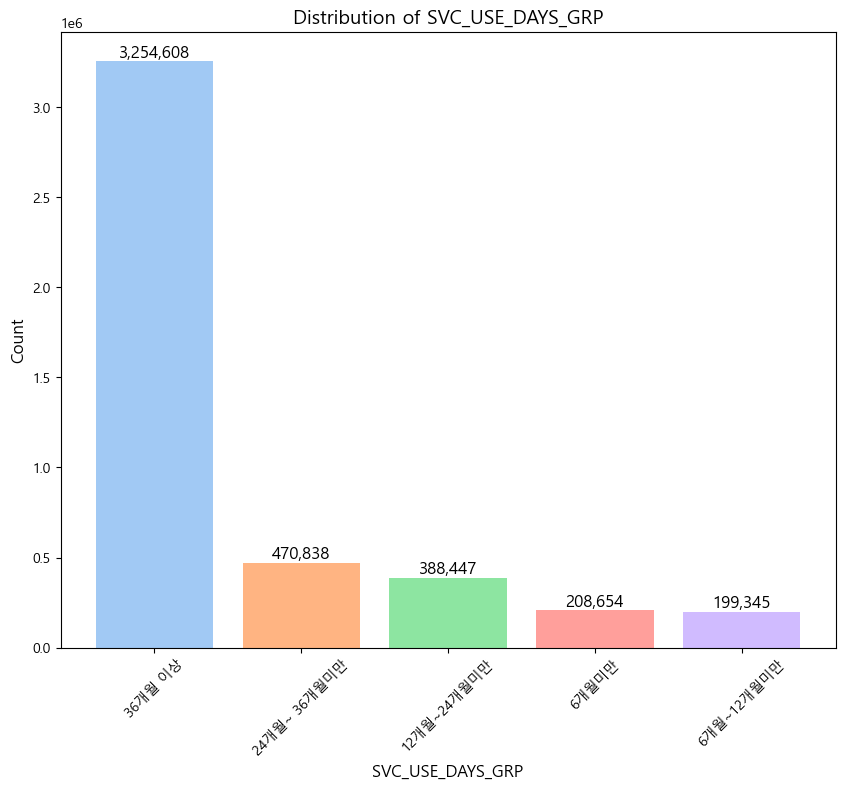

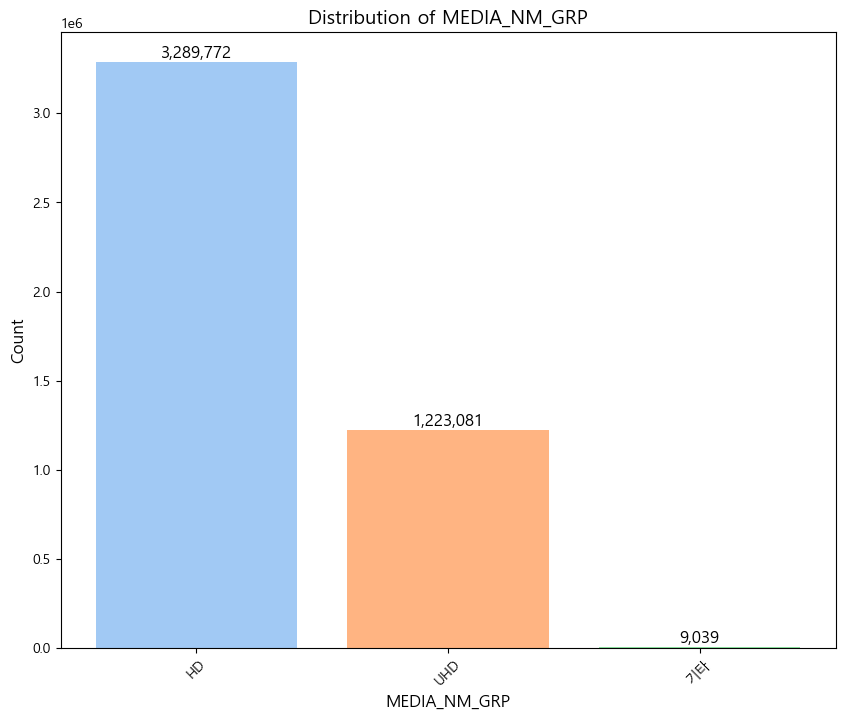

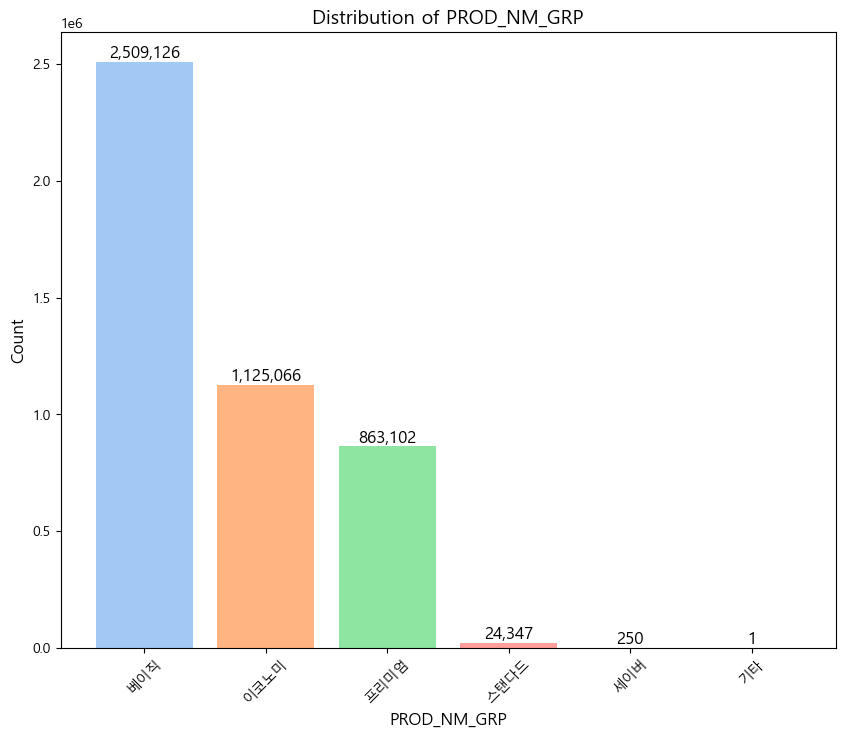

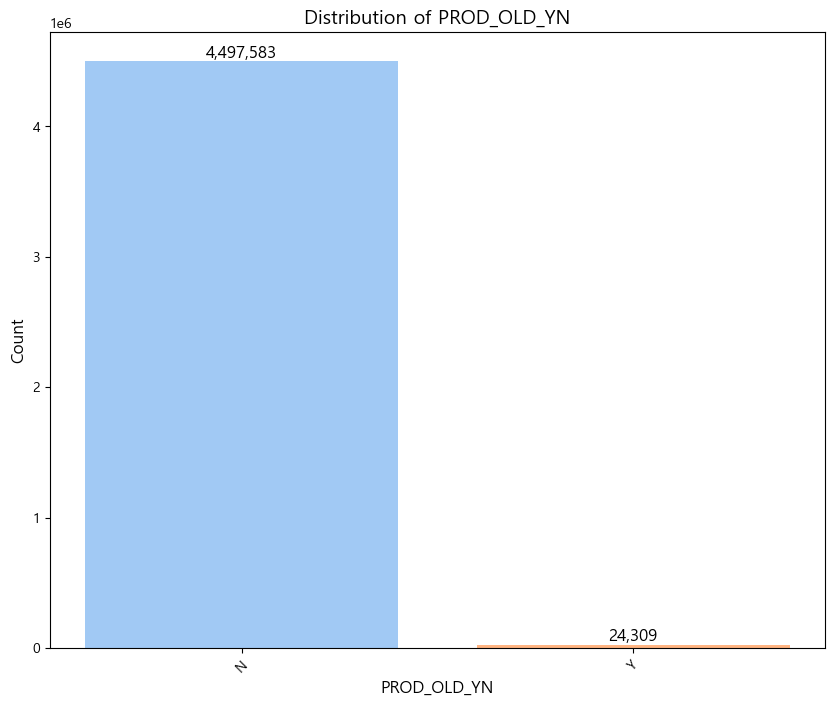

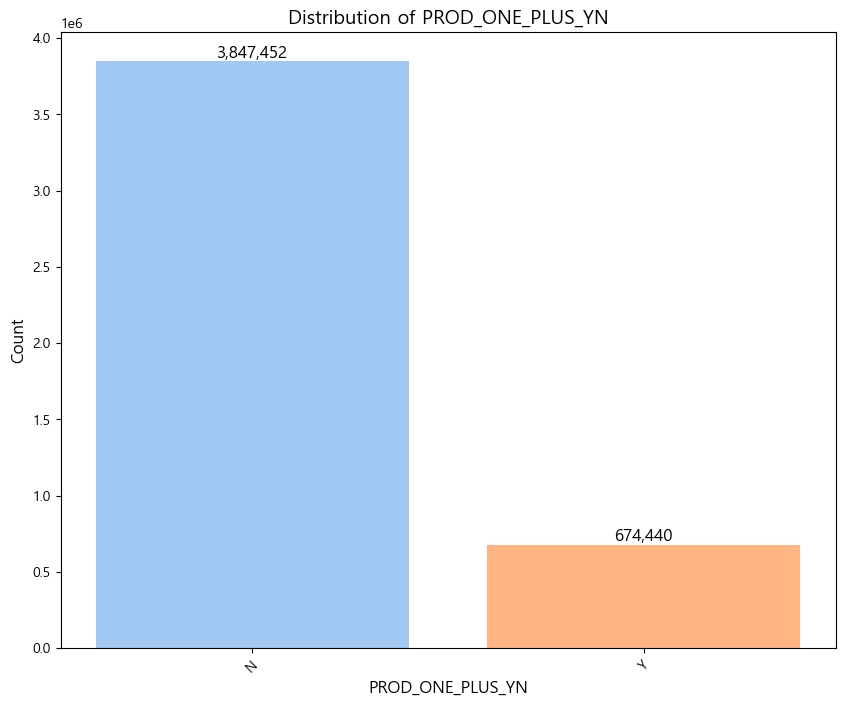

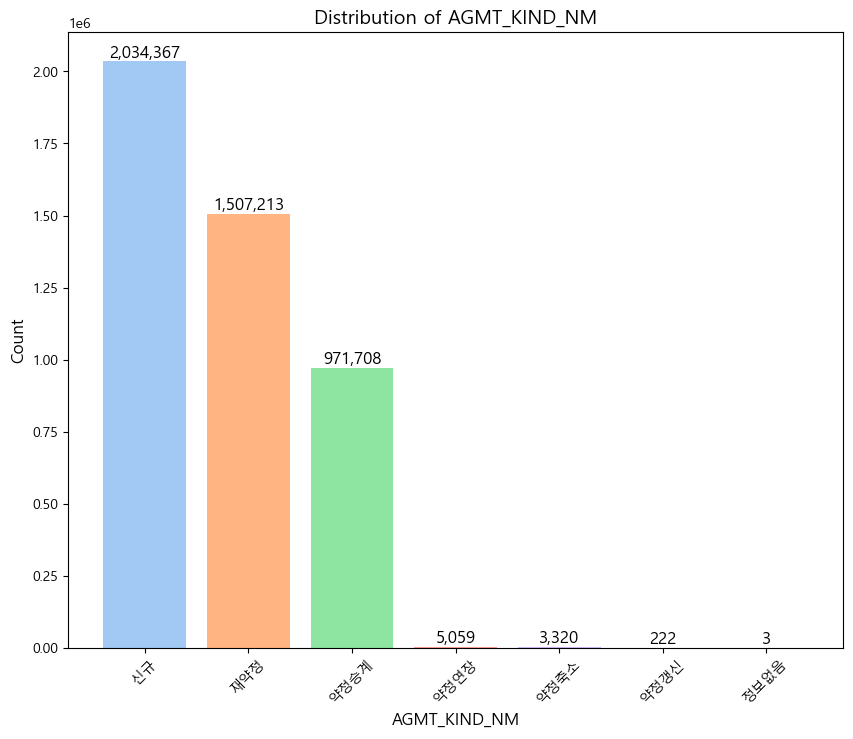

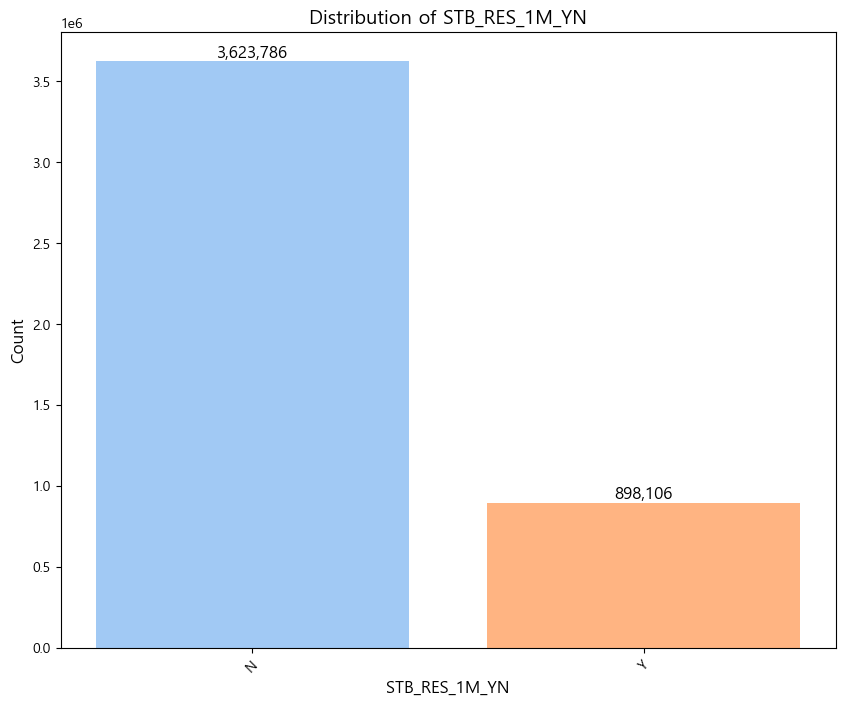

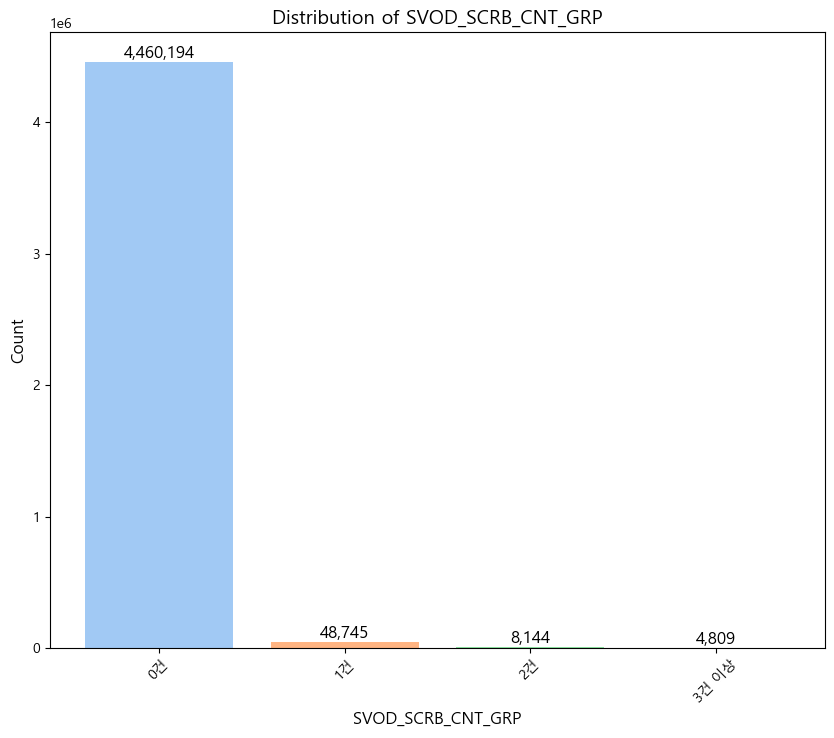

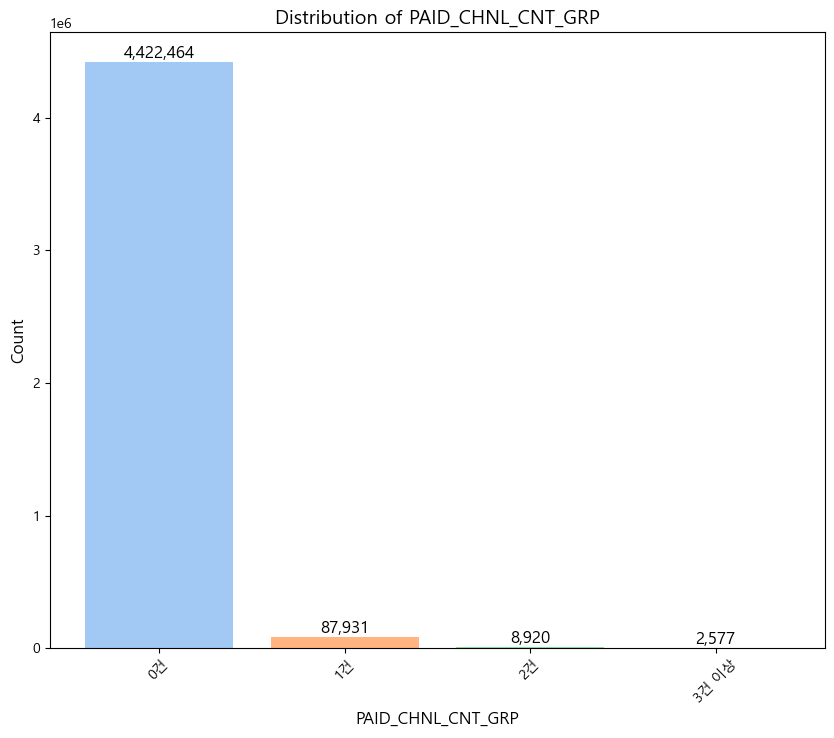

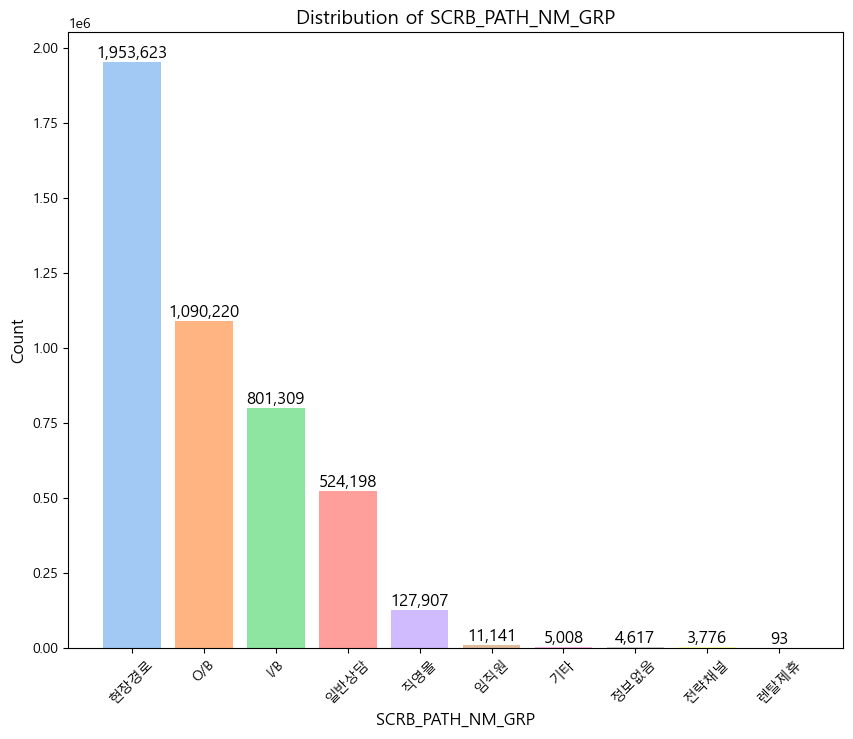

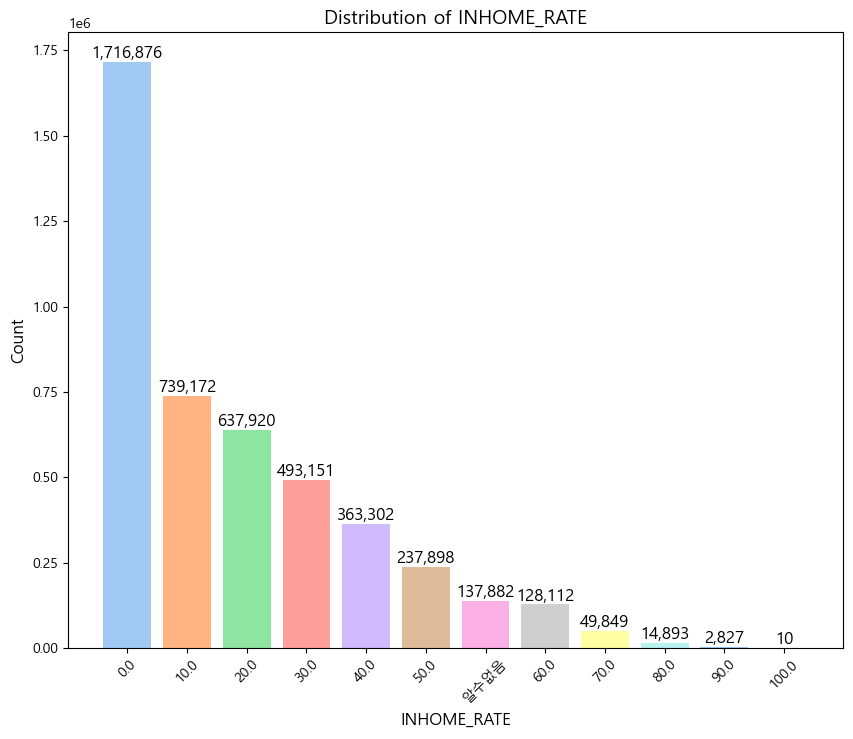

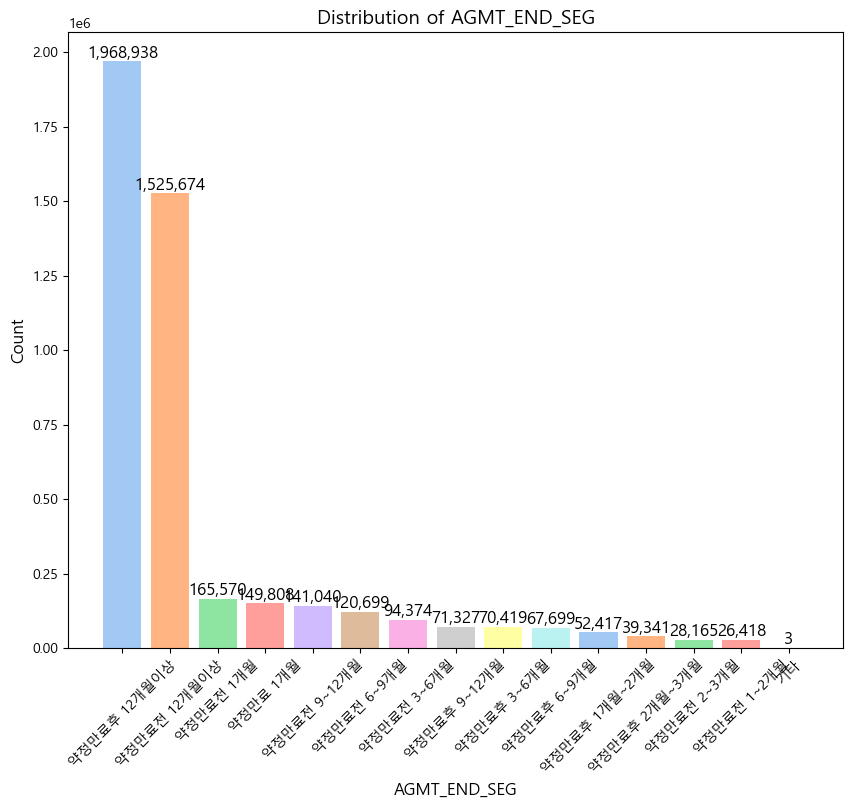

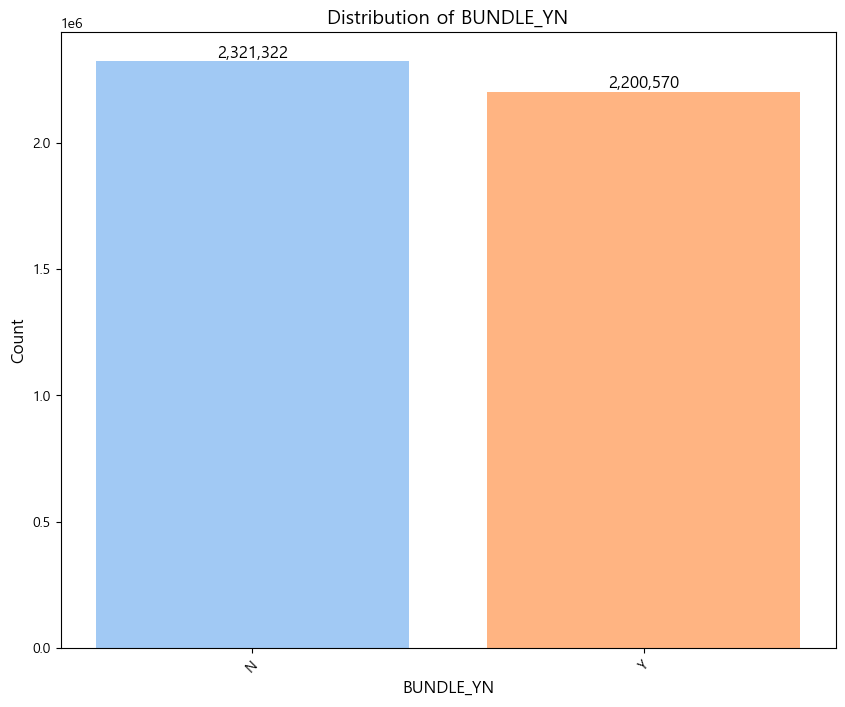

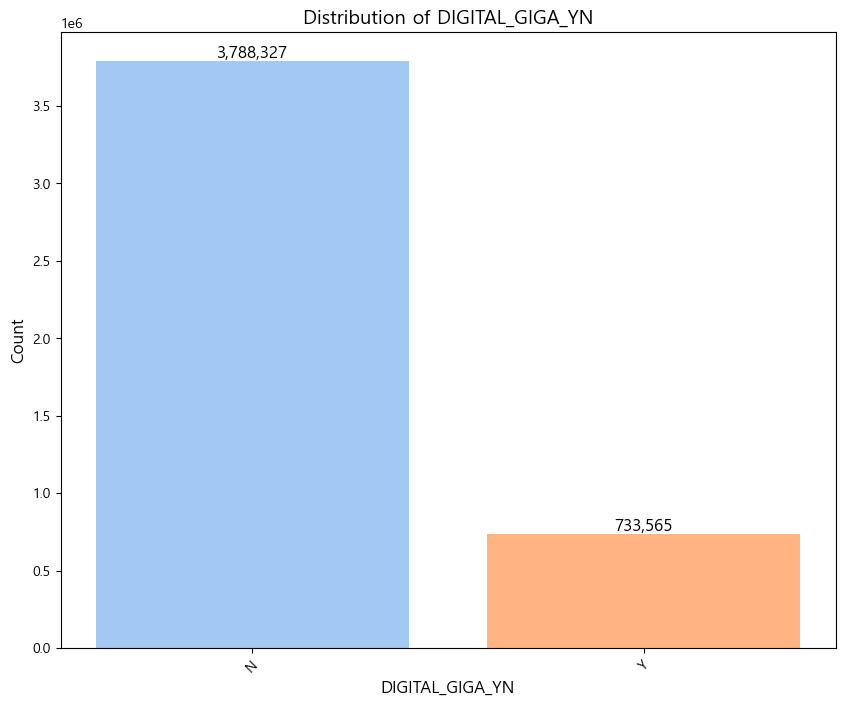

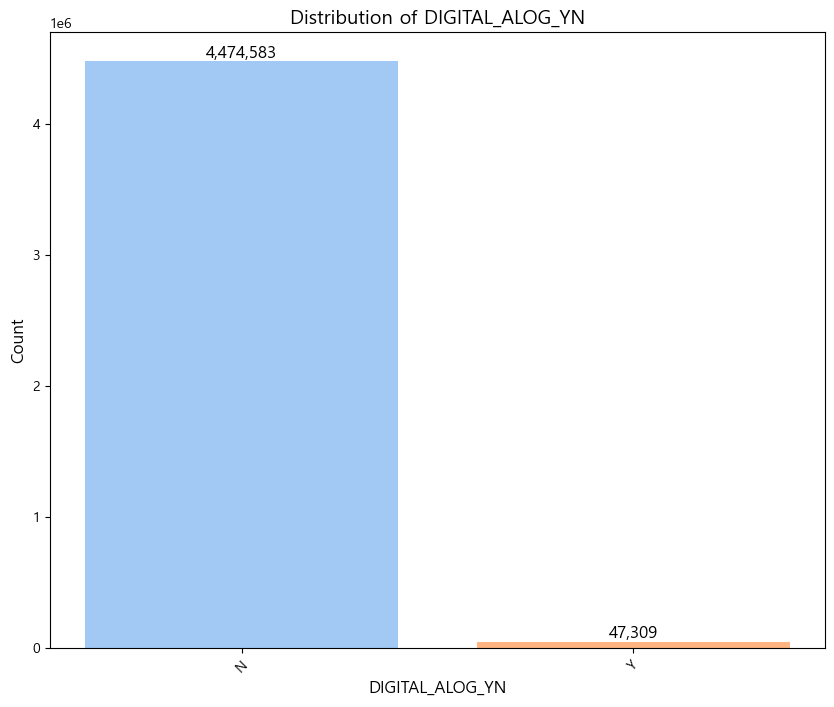

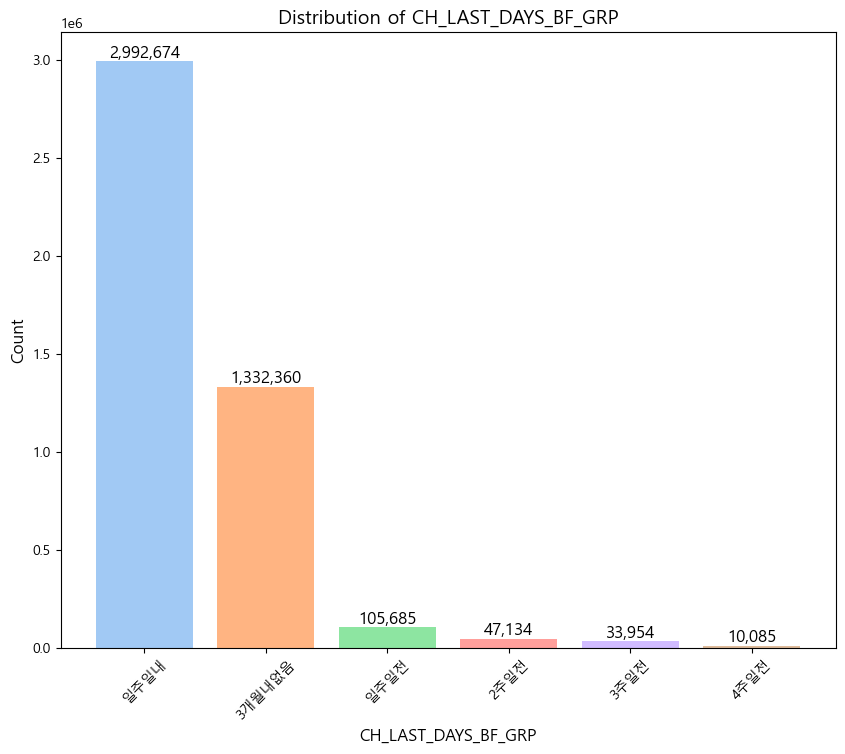

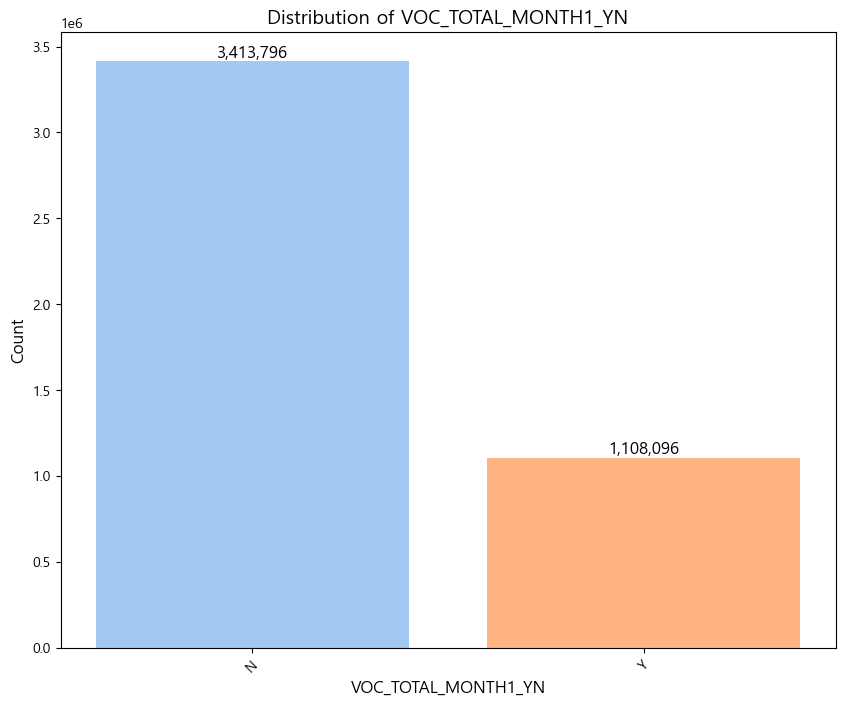

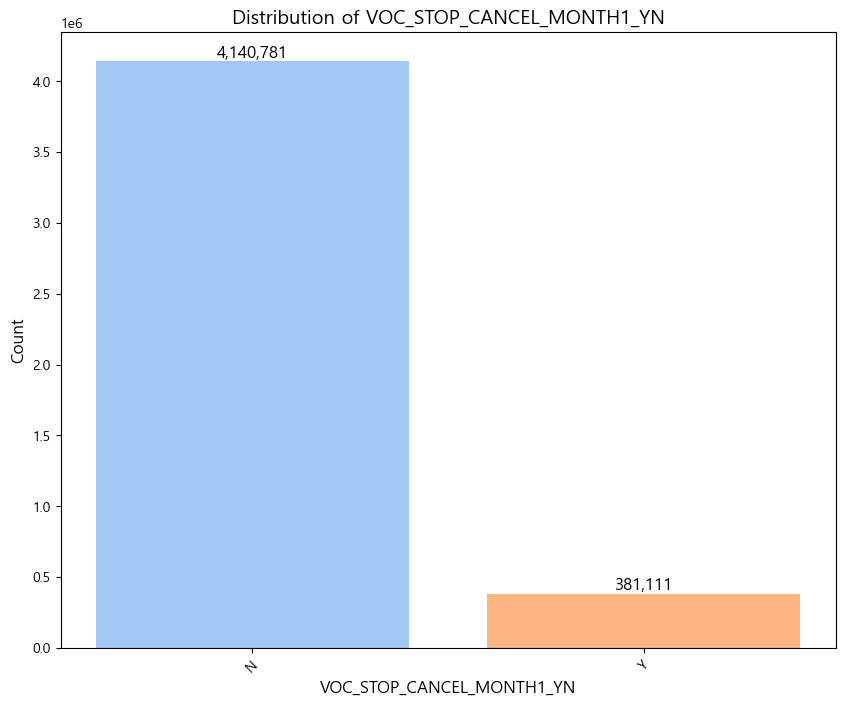

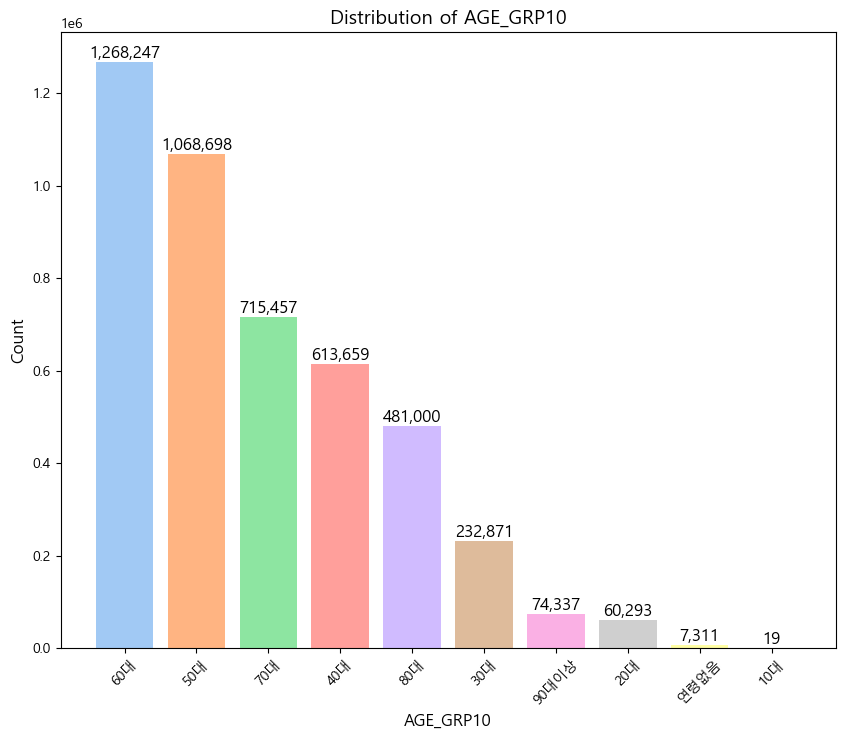

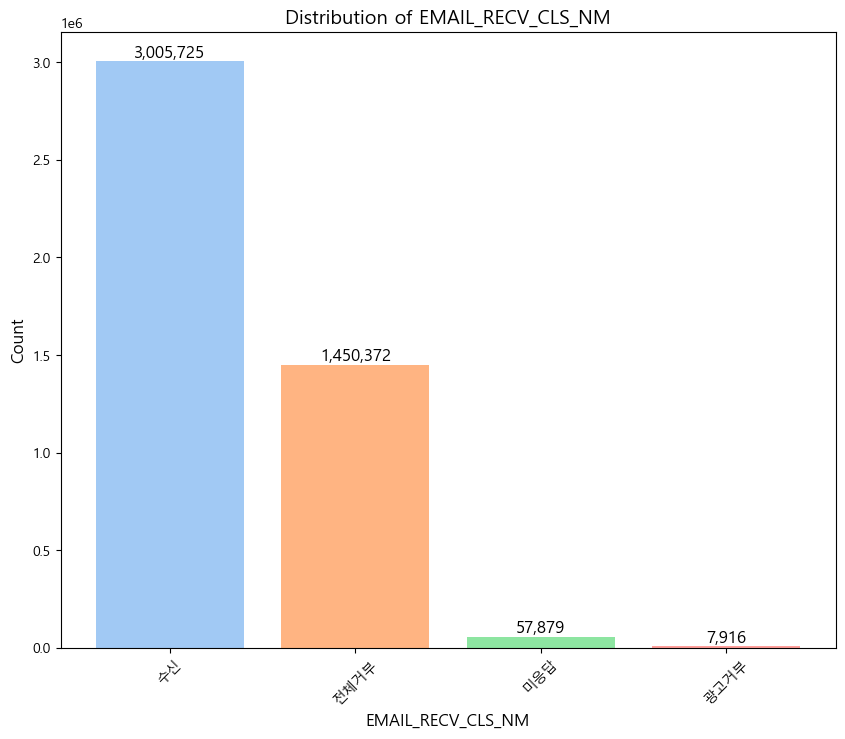

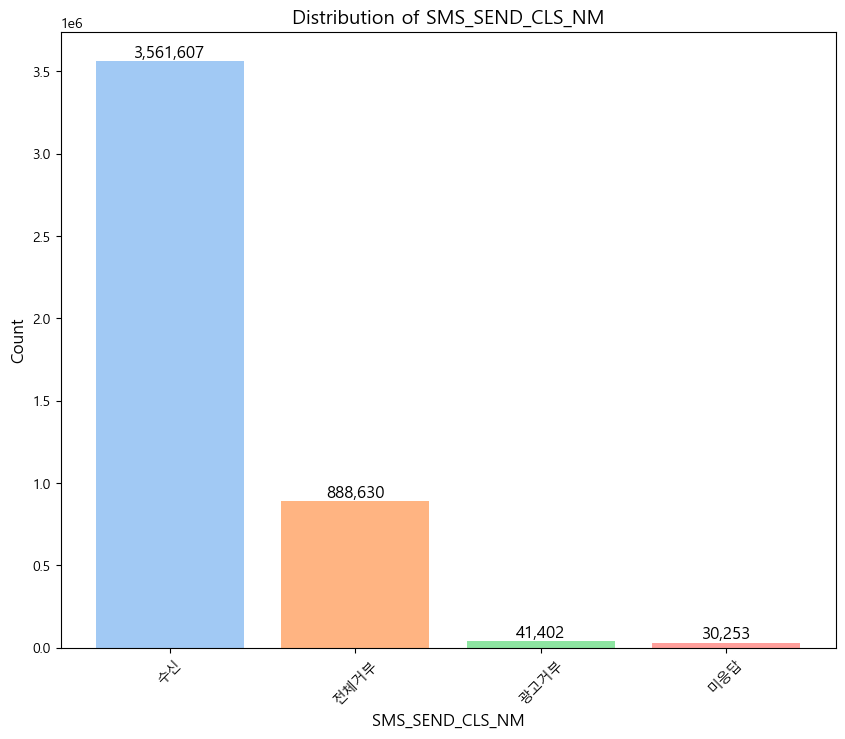

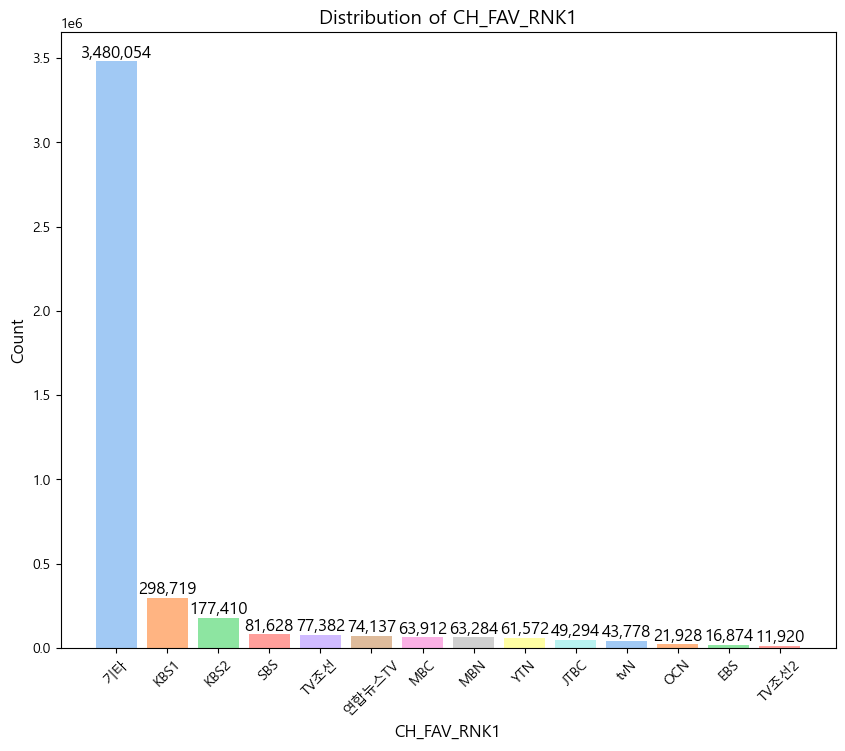

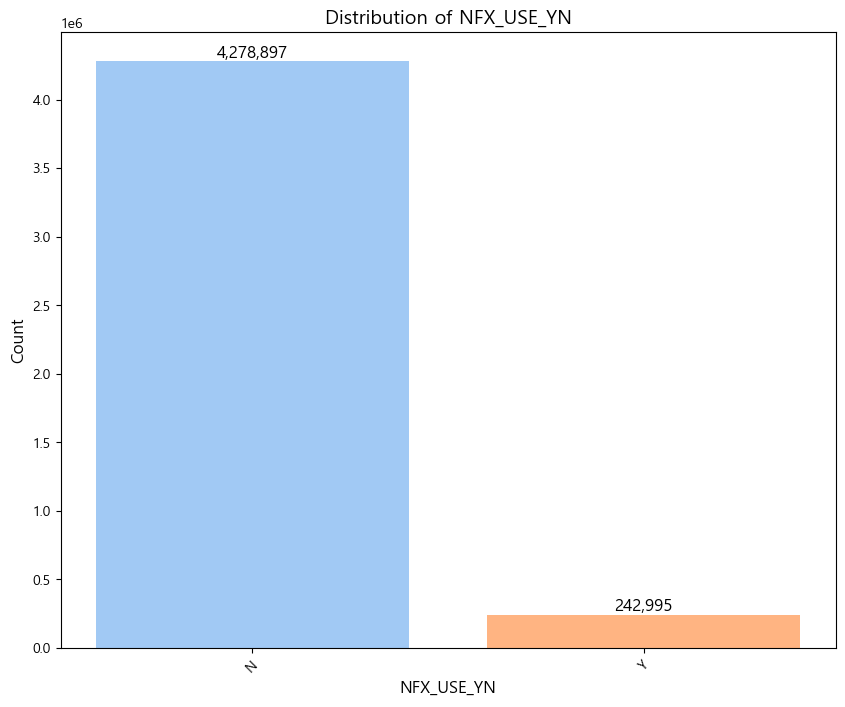

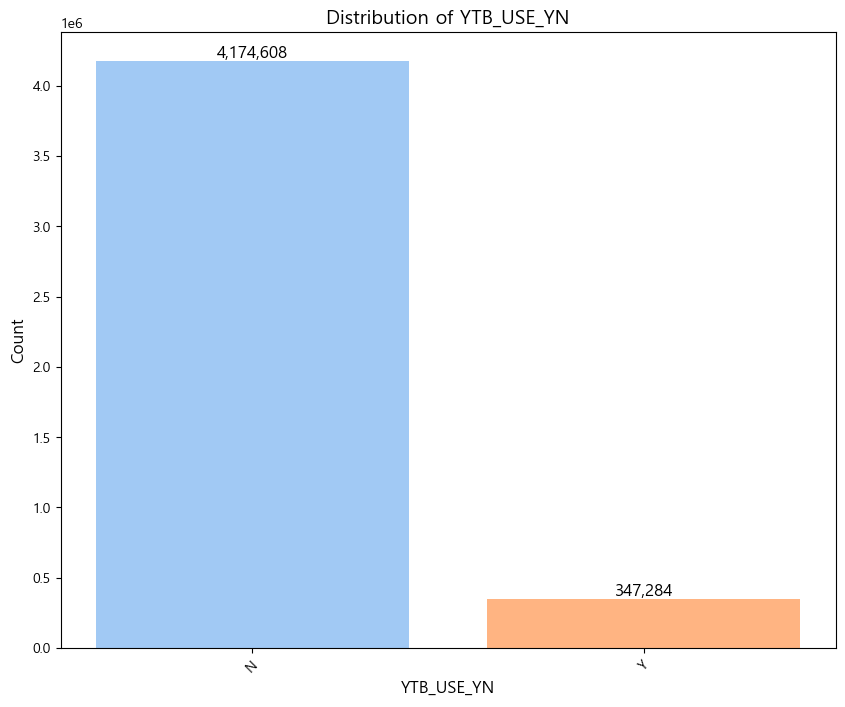

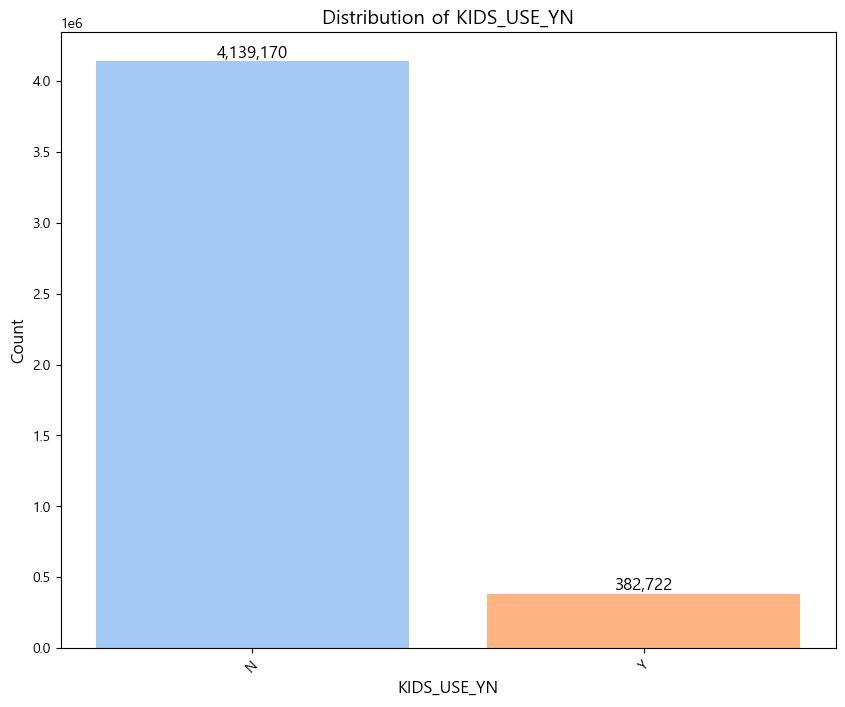

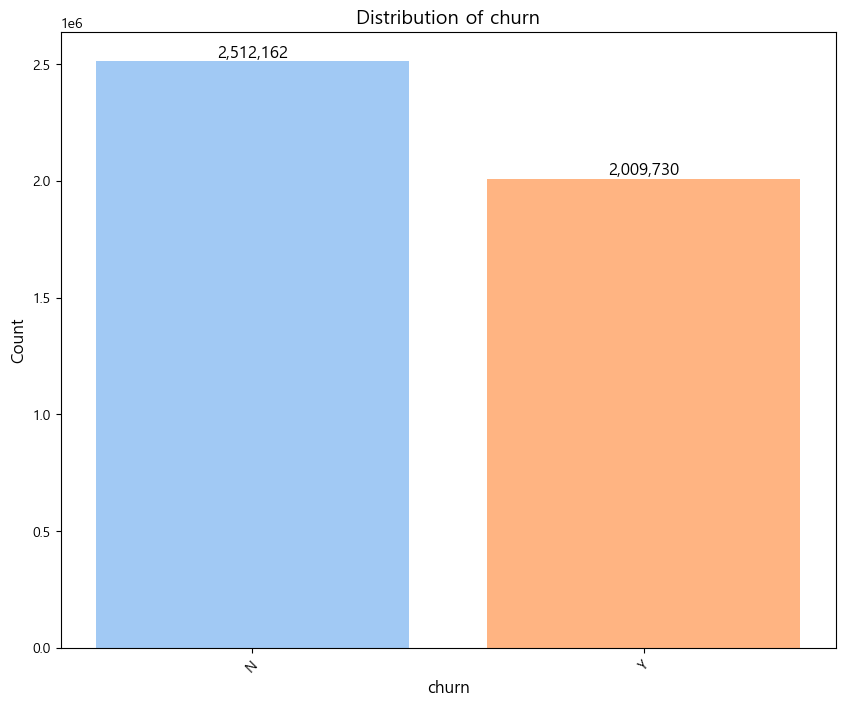

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

object_columns = df_3.select_dtypes(include=['object']).columns
exclude_cols = ['sha2_hash', 'p_mt', 'AGMT_END_YMD']

palette = sns.color_palette("pastel", 10)

for col in object_columns:
    if col not in exclude_cols:
        plt.figure(figsize=(10, 8))
        value_counts = df_3[col].value_counts()

        bars = plt.bar(value_counts.index, value_counts.values, 
                       color=palette[:len(value_counts)])  

        for bar in bars:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                     f'{bar.get_height():,}', ha='center', va='bottom', fontsize=12)

        plt.xlabel(col, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.title(f'Distribution of {col}', fontsize=14)
        plt.xticks(rotation=45)

        plt.show()


#### df_1 (랜덤언더샘플링) 연속형 변수 확인

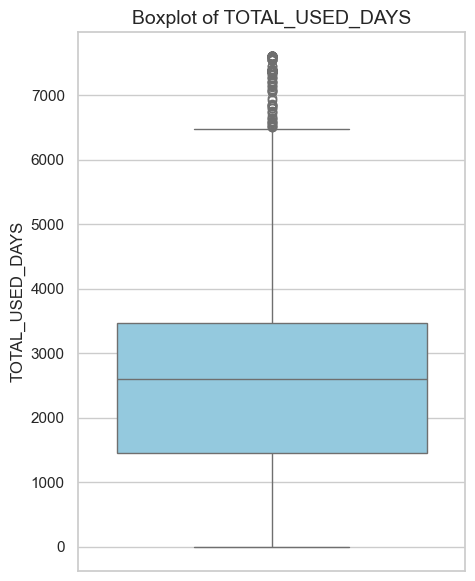

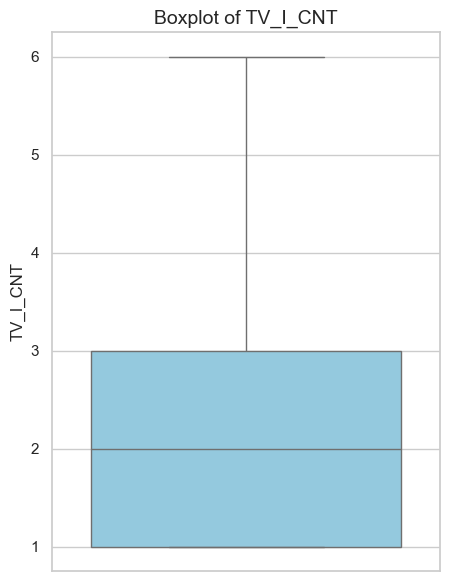

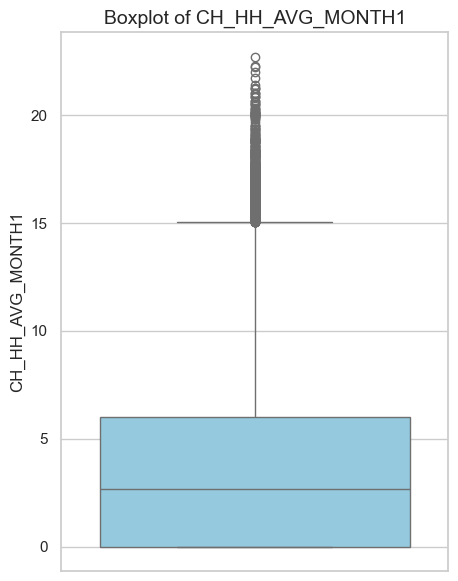

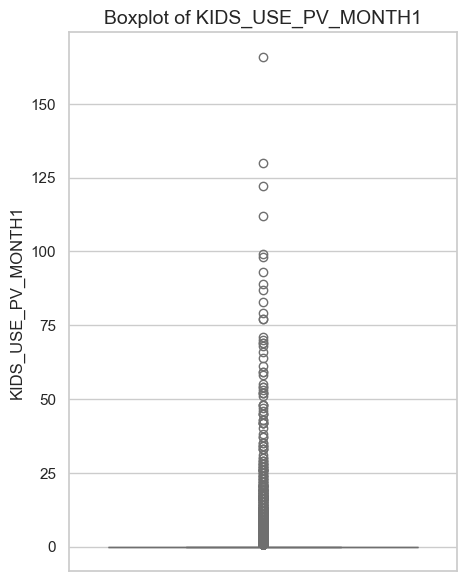

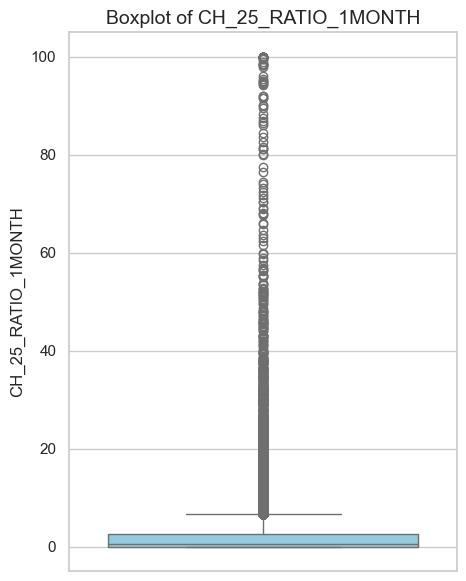

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# df_1에서 연속형(수치형) 변수 찾기 (p_mt 제외)
numeric_columns = df_1.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = [col for col in numeric_columns if col != 'p_mt']

# Seaborn 스타일 적용
sns.set(style="whitegrid")

# 각 연속형 변수에 대해 boxplot 생성 (세로 방향, 동일한 색상)
for col in numeric_columns:
    plt.figure(figsize=(5, 7))  # 세로로 길게 설정
    sns.boxplot(y=df_1[col], color="skyblue")  # 동일한 색상 사용

    # 제목 및 라벨 추가
    plt.ylabel(col, fontsize=12)
    plt.title(f'Boxplot of {col}', fontsize=14)

    # 그래프 표시
    plt.show()


#### df_2 (SMOTE-NC) 연속형 변수 확인

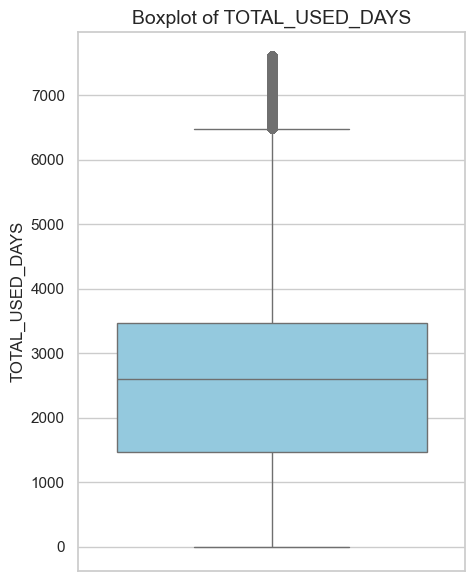

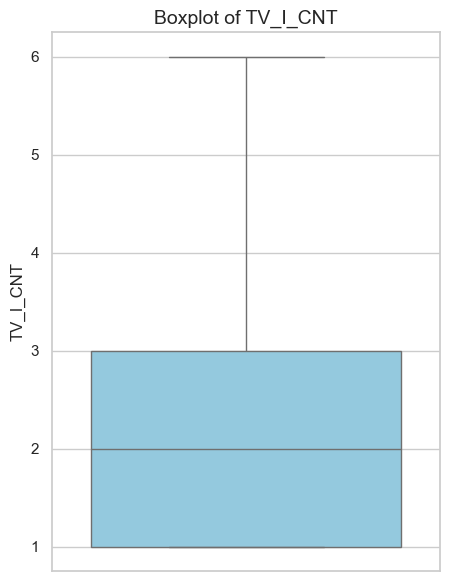

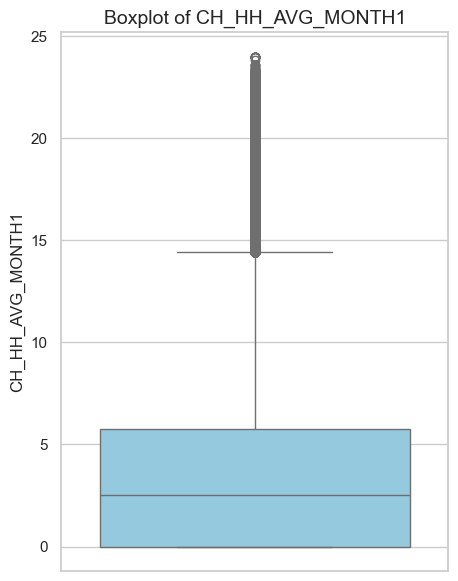

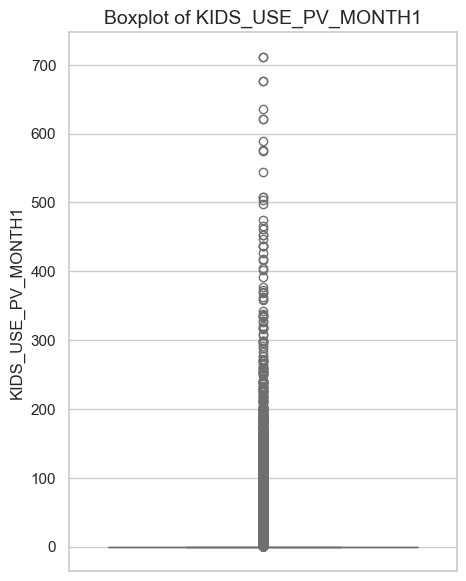

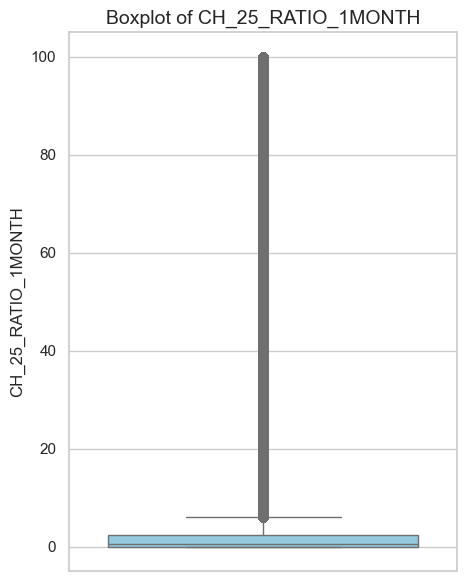

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df_2.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = [col for col in numeric_columns if col != 'p_mt']

sns.set(style="whitegrid")

for col in numeric_columns:
    plt.figure(figsize=(5, 7))
    sns.boxplot(y=df_2[col], color="skyblue")

    plt.ylabel(col, fontsize=12)
    plt.title(f'Boxplot of {col}', fontsize=14)

    plt.show()


#### df_3 (SMOTE-NC + 랜덤 언더 샘플링) 연속형 변수 확인

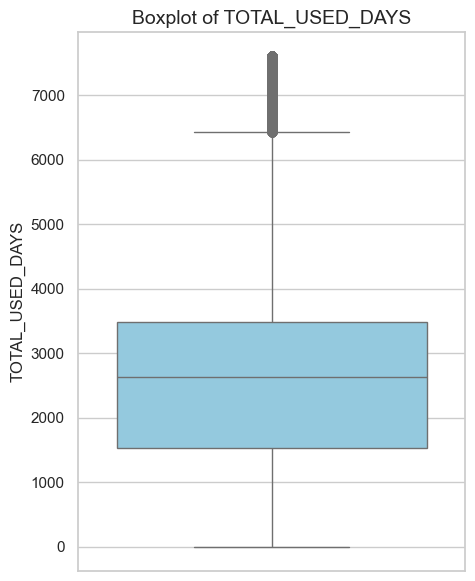

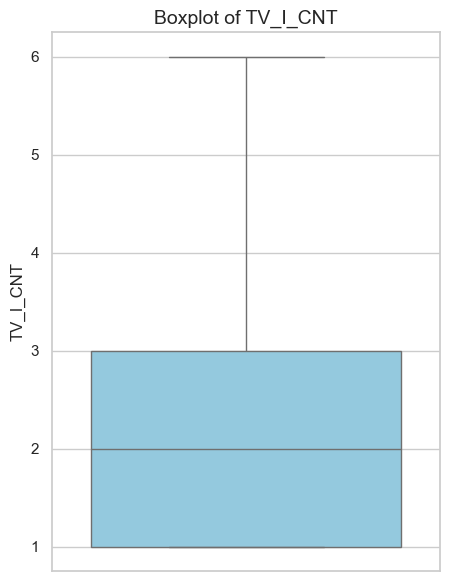

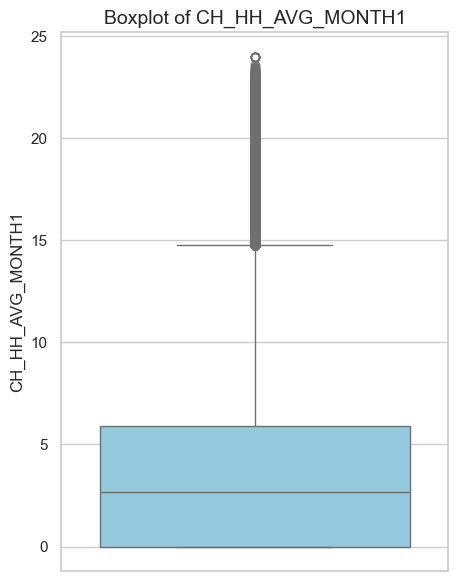

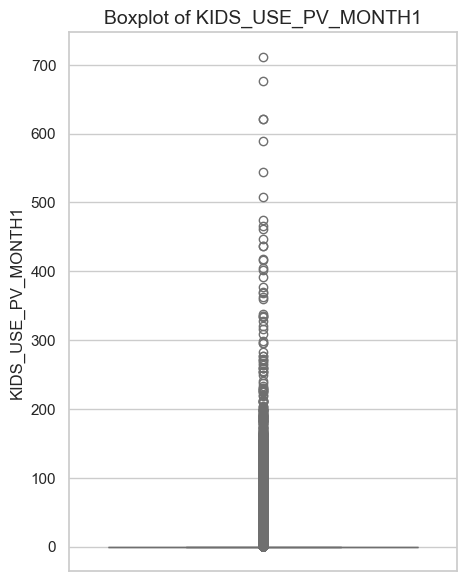

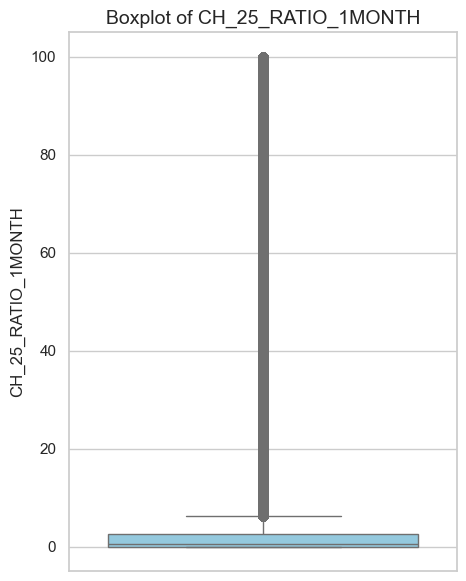

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df_3.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = [col for col in numeric_columns if col != 'p_mt']

sns.set(style="whitegrid")

for col in numeric_columns:
    plt.figure(figsize=(5, 7))
    sns.boxplot(y=df_3[col], color="skyblue")

    plt.ylabel(col, fontsize=12)
    plt.title(f'Boxplot of {col}', fontsize=14)

    plt.show()
